In [218]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import ticker

# Section 1: Retrieving Historical traffic data to identify past patterns and trends

This historical traffic data is being extracted from 
1. LTA (https://datamall.lta.gov.sg/content/datamall/en/static-data.html)
2. SingStat (https://www.singstat.gov.sg/find-data) 

By analysing historical data, this allows us to identify seasonal variations, annual trends, and changes in traffic patterns over time. This understanding is essential for making informed decisions and planning infrastructure improvements.

Furthermore, historical traffic data serves as a valuable input for building predictive models. By analysing past traffic patterns, this better allow us to develop models to forecast future traffic conditions, predict congestion levels, and anticipate traffic flow changes. These predictive models help in optimising traffic management strategies, such as signal timing adjustments, lane management, and route planning. 

# Section 1.1: Analysis within the dataset (static data)

## Dataset 1: Public transport ridership

In [219]:
# Extracting data from public_transport spreadsheet
pt = pd.read_csv('public_transport.csv')

# Print the first 5 data to have an overview
pt.head()

,year,mode,ridership
0,1995,MRT,740000
1,1995,LRT,0
2,1995,Public Bus,3009000
3,1996,MRT,850000
4,1996,LRT,0


In [220]:
# Find out the number of rows in the public_transport spreadsheet
print("Data dims : ", pt.shape)

Data dims :  (84, 3)


In [221]:
# Tidy the data using the mode of transport
pt = pt.pivot(index='year', columns='mode', values='ridership').reset_index()

pt.columns.name = None

# Reorder the columns
pt = pt[['year', 'LRT', 'MRT', 'Public Bus']]

# Add a new column "total" which is the sum of "LRT", "MRT", "Public Bus" for each year
pt['total'] = pt['LRT'] + pt['MRT'] + pt['Public Bus']

# Change year to a Date variable
pt['year'] = pd.to_datetime(pt['year'], format='%Y')

# Print the first 5 data to have overview
pt.head()

,year,LRT,MRT,Public Bus,total
0,1995-01-01,0,740000,3009000,3749000
1,1996-01-01,0,850000,3118000,3968000
2,1997-01-01,0,911000,3116000,4027000
3,1998-01-01,0,946000,3121000,4067000
4,1999-01-01,27000,986000,3213000,4226000


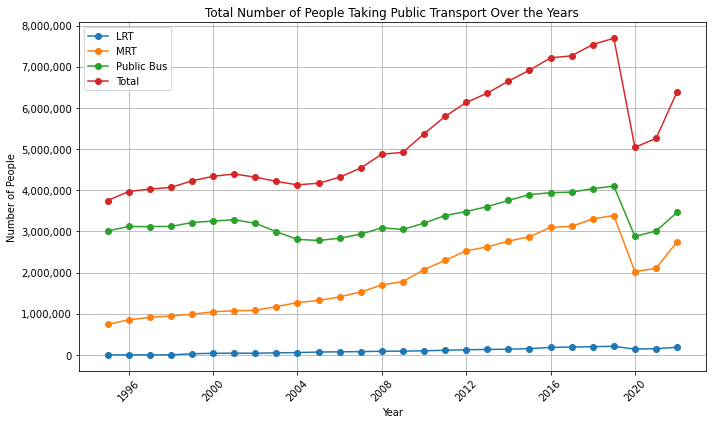

In [222]:
# Plot the graph
plt.figure(figsize=(10, 6))

# Plot LRT
plt.plot(pt['year'], pt['LRT'], marker='o', linestyle='-', label='LRT')

# Plot MRT
plt.plot(pt['year'], pt['MRT'], marker='o', linestyle='-', label='MRT')

# Plot Public Bus
plt.plot(pt['year'], pt['Public Bus'], marker='o', linestyle='-', label='Public Bus')

# Plot total
plt.plot(pt['year'], pt['total'], marker='o', linestyle='-', label='Total')
plt.title('Total Number of People Taking Public Transport Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))) # Format y-axis tick labels
plt.tight_layout()
plt.show()

We observe a stable increasing trend in the public transport ridership from 1995 to 2019. However, we observe a huge drop in the ridership from 2019 to 2020, which is likely due to the COVID-19 breakout. 

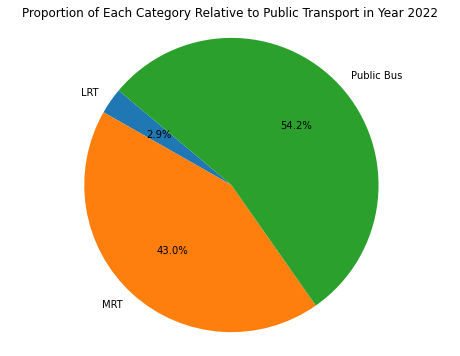

In [223]:
# Filter data for the year 2022
public_2022 = pt[pt['year'] == '2022-01-01'].drop(columns=['year'])

# Calculate the total public transport ridership
total_public_transport = public_2022['total'].sum()

# Calculate the proportion of each category relative to public transport
public_2022['LRT_proportion'] = public_2022['LRT'] / total_public_transport
public_2022['MRT_proportion'] = public_2022['MRT'] / total_public_transport
public_2022['Public_Bus_proportion'] = public_2022['Public Bus'] / total_public_transport

# Pie chart labels
labels = ['LRT', 'MRT', 'Public Bus']

# Proportions for each category
proportions = [
    public_2022['LRT_proportion'].iloc[-1],
    public_2022['MRT_proportion'].iloc[-1],
    public_2022['Public_Bus_proportion'].iloc[-1]
]

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(proportions, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Category Relative to Public Transport in Year 2022')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Dataset 2: Pedestrian facilities

In [224]:
# Extracting data from pedestrian_facilities spreadsheet
pf = pd.read_csv('pedestrian_facilities.csv')

# Print the first 5 data to have an overview
pf.head()

,year,facility,number
0,1994,Pedestrian Overhead Bridges,336.0
1,1994,Pedestrian Underpasses,48.0
2,1994,Footbridges,15.0
3,1994,Covered Linkways,0.0
4,1995,Pedestrian Overhead Bridges,350.0


In [225]:
# Find out the number of rows in the pedestrian_facilities spreadsheet
print("Data dims : ", pf.shape)

Data dims :  (116, 3)


In [226]:
# Tidy the data using the facility name
pf = pf.pivot(index='year', columns='facility', values='number').reset_index()

pf.columns.name = None

# Reorder the columns
pf = pf[['year', 'Pedestrian Overhead Bridges', 'Pedestrian Underpasses', 'Footbridges', 'Covered Linkways']]

# Change year to a Date variable
pf['year'] = pd.to_datetime(pf['year'], format='%Y')

# Print the first 5 data to have overview
pf.head()

,year,Pedestrian Overhead Bridges,Pedestrian Underpasses,Footbridges,Covered Linkways
0,1994-01-01,336.0,48.0,15.0,0.0
1,1995-01-01,350.0,49.0,15.0,0.0
2,1996-01-01,359.0,50.0,16.0,0.0
3,1997-01-01,369.0,50.0,17.0,0.0
4,1998-01-01,380.0,51.0,22.0,0.0


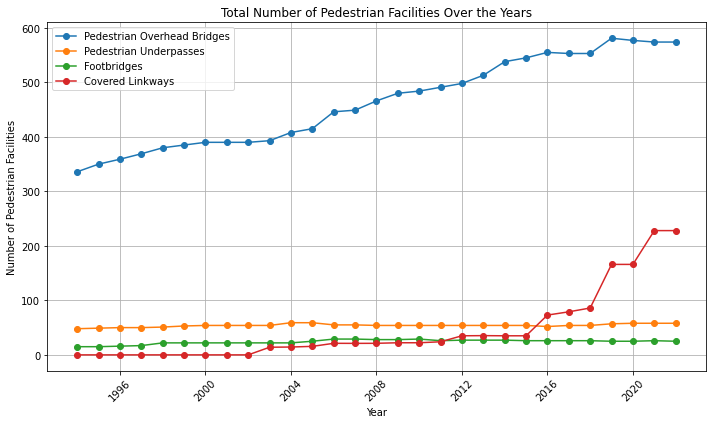

In [227]:
# Plot the graph
plt.figure(figsize=(10, 6))

# Plot Pedestrian Overhead Bridges
plt.plot(pf['year'], pf['Pedestrian Overhead Bridges'], marker='o', linestyle='-', label='Pedestrian Overhead Bridges')

# Plot Pedestrian Underpasses
plt.plot(pf['year'], pf['Pedestrian Underpasses'], marker='o', linestyle='-', label='Pedestrian Underpasses')

# Plot Footbridges
plt.plot(pf['year'], pf['Footbridges'], marker='o', linestyle='-', label='Footbridges')

# Plot Covered Linkways
plt.plot(pf['year'], pf['Covered Linkways'], marker='o', linestyle='-', label='Covered Linkways')

plt.title('Total Number of Pedestrian Facilities Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Pedestrian Facilities')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We observe that the number of pedestrian overhead bridges and covered linkways increased steadily from 1994 to 2022. On the other hand, the number of pedestrian underpasses and footbridges remained relatively constant from 1994 to 2022. The number of pedestrian overhead bridges is also significantly higher than the other pedestrian facilities.

## Dataset 3: Traffic facilities

In [228]:
# Extracting data from traffic_facilities spreadsheet
tf = pd.read_csv('traffic_facilities.csv')

# Print the first 5 data to have an overview
tf.head()

,year,facility,number
0,1994,Traffic Lights,1256
1,1994,ERP Gantries,0
2,1995,Traffic Lights,1308
3,1995,ERP Gantries,0
4,1996,Traffic Lights,1381


In [229]:
# Find out the number of rows in the traffic_facilties spreadsheet
print("Data dims : ", tf.shape)

Data dims :  (48, 3)


In [230]:
# Tidy the data using the facility name 
tf = tf.pivot(index='year', columns='facility', values='number').reset_index()

tf.columns.name = None

# Reorder the columns
tf = tf[['year', 'Traffic Lights', 'ERP Gantries']]

# Change year to a Date variable
tf['year'] = pd.to_datetime(tf['year'], format='%Y')

# Print the first 5 data to have overview
tf.head()

,year,Traffic Lights,ERP Gantries
0,1994-01-01,1256,0
1,1995-01-01,1308,0
2,1996-01-01,1381,0
3,1997-01-01,1463,0
4,1998-01-01,1528,33


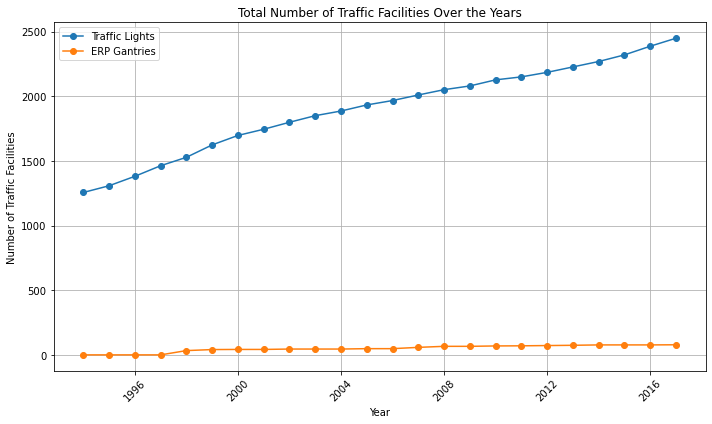

In [231]:
# Plot the graph
plt.figure(figsize=(10, 6))

# Plot Traffic Lights
plt.plot(tf['year'], tf['Traffic Lights'], marker='o', linestyle='-', label='Traffic Lights')

# Plot ERP Gantries
plt.plot(tf['year'], tf['ERP Gantries'], marker='o', linestyle='-', label='ERP Gantries')

plt.title('Total Number of Traffic Facilities Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Traffic Facilities')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We observe that the number of traffic lights increased steadily over the years from 1994 to 2017. On the other hand, the number of ERP gantries remained at 0 from 1994 to 1997. After which, the number of ERP gantries increased at a relatively slow speed from 1997 to 2017. 

## Dataset 4: Vehicular facilities

In [232]:
# Extracting data from vehicular_facilities spreadsheet
vf = pd.read_csv('vehicular_facilities.csv')

# Print the first 5 data to have an overview
vf.head()

,year,facility,number
0,1994,Flyovers,79
1,1994,Vehicular Bridges,180
2,1994,Vehicular Underpasses & Tunnels,10
3,1995,Flyovers,83
4,1995,Vehicular Bridges,196


In [233]:
# Find out the number of rows in the vehicular_facilties spreadsheet
print("Data dims : ", vf.shape)

Data dims :  (87, 3)


In [234]:
# Tidy the data using the facility name 
vf = vf.pivot(index='year', columns='facility', values='number').reset_index()

vf.columns.name = None

# Reorder the columns
vf = vf[['year', 'Flyovers', 'Vehicular Bridges', 'Vehicular Underpasses & Tunnels']]

# Change year to a Date variable
vf['year'] = pd.to_datetime(vf['year'], format='%Y')

# Print the first 5 data to have overview
vf.head()

,year,Flyovers,Vehicular Bridges,Vehicular Underpasses & Tunnels
0,1994-01-01,79,180,10
1,1995-01-01,83,196,12
2,1996-01-01,86,196,12
3,1997-01-01,93,200,14
4,1998-01-01,95,202,18


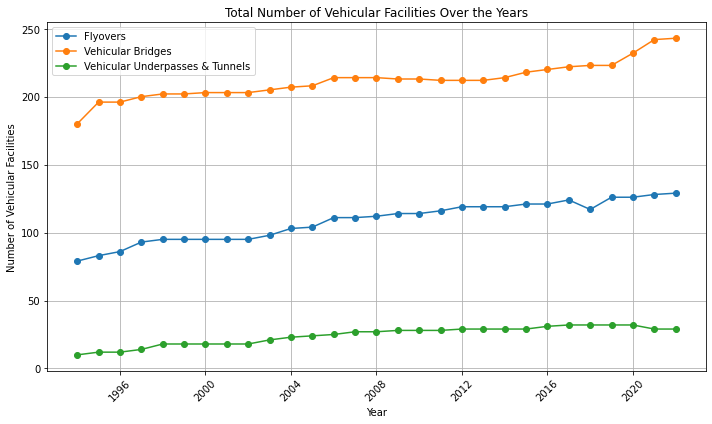

In [235]:
# Plot the graph
plt.figure(figsize=(10, 6))

# Plot Flyovers
plt.plot(vf['year'], vf['Flyovers'], marker='o', linestyle='-', label='Flyovers')

# Plot Vehicular Bridges
plt.plot(vf['year'], vf['Vehicular Bridges'], marker='o', linestyle='-', label='Vehicular Bridges')

# PlotVehicular Underpasses & Tunnels
plt.plot(vf['year'], vf['Vehicular Underpasses & Tunnels'], marker='o', linestyle='-', label='Vehicular Underpasses & Tunnels')

plt.title('Total Number of Vehicular Facilities Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Vehicular Facilities')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We observe that the number of flyovers, vehicular bridges, vehicular underpasses & tunnels generally increased from 1994 to 2022. The number of vehicular bridges is the highest, followed by the number of flyovers and the number of vehicular underpasses & tunnels.

## Dataset 5: Traffic volume entering the city

In [236]:
# Extracting data from traffic_volume spreadsheet
tv = pd.read_csv('traffic_volume.csv')

# Print the first 5 data to have an overview
tv.head()

,year,ave_daily_traffic_volume_entering_city
0,2004,246000
1,2005,244000
2,2006,270400
3,2007,278300
4,2008,278100


In [237]:
# Find out the number of rows in the traffic_volume spreadsheet
print("Data dims : ", tv.shape)

Data dims :  (11, 2)


In [238]:
# Change year to a Date variable
tv['year'] = pd.to_datetime(tv['year'], format='%Y')

# Print the first 5 data to have an overview
tv.head()

,year,ave_daily_traffic_volume_entering_city
0,2004-01-01,246000
1,2005-01-01,244000
2,2006-01-01,270400
3,2007-01-01,278300
4,2008-01-01,278100


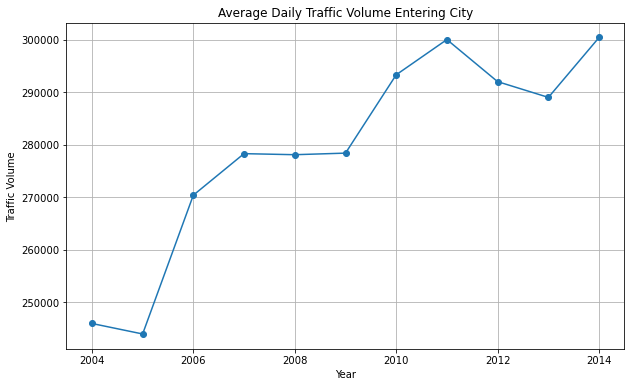

In [239]:
tv_year = tv['year']
tv_volume = tv['ave_daily_traffic_volume_entering_city']

# Plot a line graph of year against traffic volume entering city
plt.figure(figsize=(10, 6))
plt.plot(tv_year, tv_volume, marker='o', linestyle='-')
plt.title('Average Daily Traffic Volume Entering City')
plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()

We observe that the average daily traffic volume entering city has generally increased from 2004 to 2014 which may pose a problem to the traffic conditions in Singapore.

## Dataset 6: Average speed during peak hours

In [240]:
# Extracting data from average_speed spreadsheet
avg = pd.read_csv('average_speed.csv')

# Print the first 5 data to have an overview
avg.head()

,year,ave_speed_expressway,ave_speed_arterial_roads
0,2004,62.7,24.8
1,2005,63.0,27.2
2,2006,61.6,27.1
3,2007,62.4,26.9
4,2008,63.3,26.7


In [241]:
# Find out the number of rows in the average_speed spreadsheet
print("Data dims : ", avg.shape)

Data dims :  (11, 3)


In [242]:
# Change year to a Date variable
avg['year'] = pd.to_datetime(avg['year'], format='%Y')

# Print the first 5 data to have an overview
avg.head()

,year,ave_speed_expressway,ave_speed_arterial_roads
0,2004-01-01,62.7,24.8
1,2005-01-01,63.0,27.2
2,2006-01-01,61.6,27.1
3,2007-01-01,62.4,26.9
4,2008-01-01,63.3,26.7


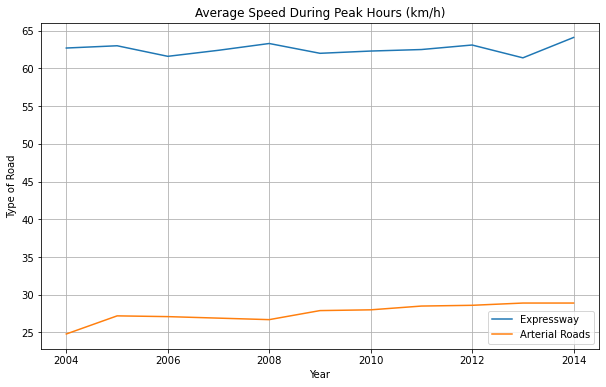

In [243]:
avg_year = avg['year']
avg_expressway = avg['ave_speed_expressway']
avg_road = avg['ave_speed_arterial_roads']

# Plot a line graph of year against average speed of vehicles on expressway and arterial roads
plt.figure(figsize=(10, 6))
plt.plot(avg_year, avg_expressway, label='Expressway')
plt.plot(avg_year, avg_road, label='Arterial Roads')
plt.title('Average Speed During Peak Hours (km/h)')
plt.xlabel('Year')
plt.ylabel('Type of Road')
plt.grid(True)
plt.legend() 
plt.show()

We observe that the average speed of vehicles is much higher on the expressway as compared to arterial roads. This is a known fact as the speed limit on expressways are often higher. 

## Dataset 7: Road accidents

In [244]:
# Extracting data from road_accidents spreadsheet
ra = pd.read_csv('road_accidents.csv')

# Print the first 5 data to have an overview
ra.head()

,year,accident_classification,road_user_group,causes_of_accident,number_of_accidents
0,2012,FATAL,"Drivers, Riders or Cyclists",Failing to Keep a Proper Lookout,59
1,2012,FATAL,"Drivers, Riders or Cyclists",Failing to Have Proper Control,50
2,2012,FATAL,"Drivers, Riders or Cyclists",Failing to Give Way to Traffic with Right of Way,9
3,2012,FATAL,"Drivers, Riders or Cyclists",Changing Lane without Due Care,6
4,2012,FATAL,"Drivers, Riders or Cyclists",Disobeying Traffic Light Signals Resulting in ...,9


In [245]:
# Find out the number of rows in the road_accidents spreadsheet
print("Data dims : ", ra.shape)

Data dims :  (328, 5)


In [246]:
# Change year to a Date variable
ra['year'] = pd.to_datetime(ra['year'], format='%Y')

# Print the first 5 data to have an overview
ra.head(20)

,year,accident_classification,road_user_group,causes_of_accident,number_of_accidents
0,2012-01-01,FATAL,"Drivers, Riders or Cyclists",Failing to Keep a Proper Lookout,59
1,2012-01-01,FATAL,"Drivers, Riders or Cyclists",Failing to Have Proper Control,50
2,2012-01-01,FATAL,"Drivers, Riders or Cyclists",Failing to Give Way to Traffic with Right of Way,9
3,2012-01-01,FATAL,"Drivers, Riders or Cyclists",Changing Lane without Due Care,6
4,2012-01-01,FATAL,"Drivers, Riders or Cyclists",Disobeying Traffic Light Signals Resulting in ...,9
5,2012-01-01,FATAL,"Drivers, Riders or Cyclists",Turning Without Due Care,2
6,2012-01-01,FATAL,"Drivers, Riders or Cyclists",Driving under the Influence of Alcohol,3
7,2012-01-01,FATAL,"Drivers, Riders or Cyclists",Overtaking without Due Care,1
8,2012-01-01,FATAL,"Drivers, Riders or Cyclists",Following Too Close to Vehicle In Front,1
9,2012-01-01,FATAL,"Drivers, Riders or Cyclists",Turning Vehicle & Failing to Give Way to Pedes...,4


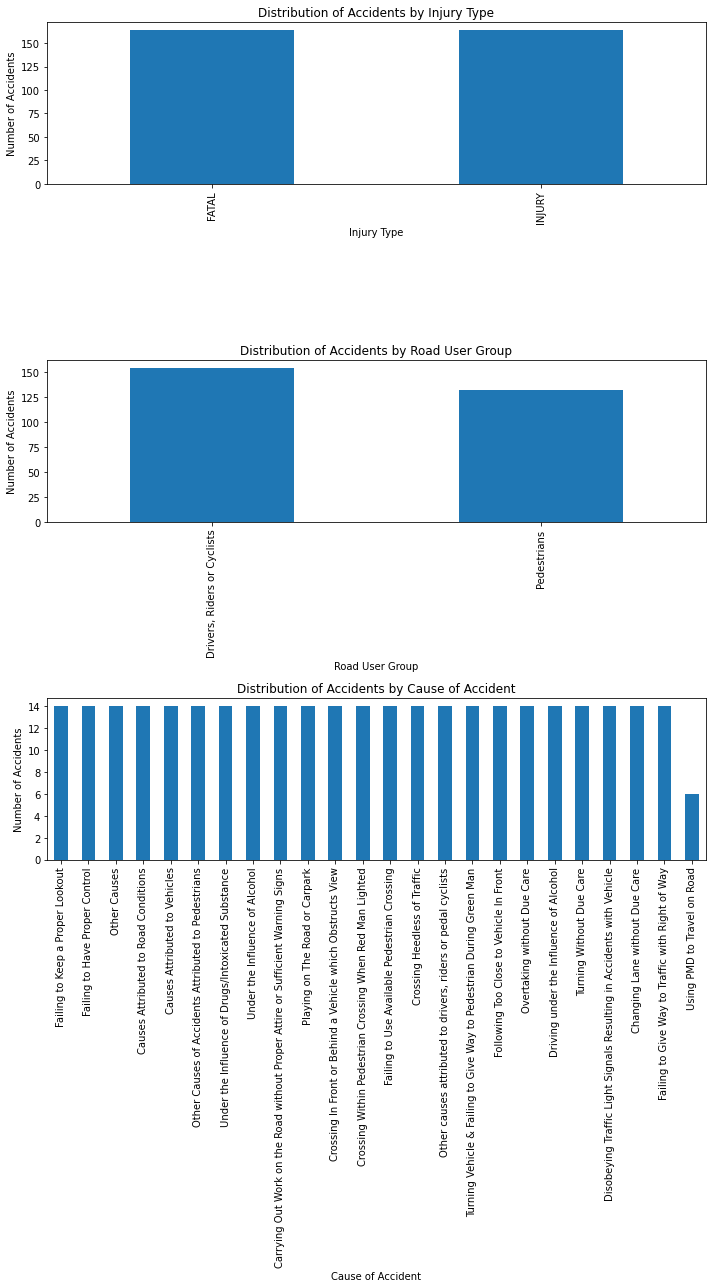

In [247]:
# Group the data by year
grouped_data = ra.groupby('year').sum()

# Plot bar plots for each categorical variable separately
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot for accident_classification
ax1 = axes[0]
ra['accident_classification'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_title('Distribution of Accidents by Injury Type')
ax1.set_xlabel('Injury Type')
ax1.set_ylabel('Number of Accidents')

# Plot for road_user_group
ax2 = axes[1]
ra['road_user_group'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_title('Distribution of Accidents by Road User Group')
ax2.set_xlabel('Road User Group')
ax2.set_ylabel('Number of Accidents')

# Plot for causes_of_accident
ax3 = axes[2]
ra['causes_of_accident'].value_counts().plot(kind='bar', ax=ax3)
ax3.set_title('Distribution of Accidents by Cause of Accident')
ax3.set_xlabel('Cause of Accident')
ax3.set_ylabel('Number of Accidents')

plt.tight_layout()
plt.show()

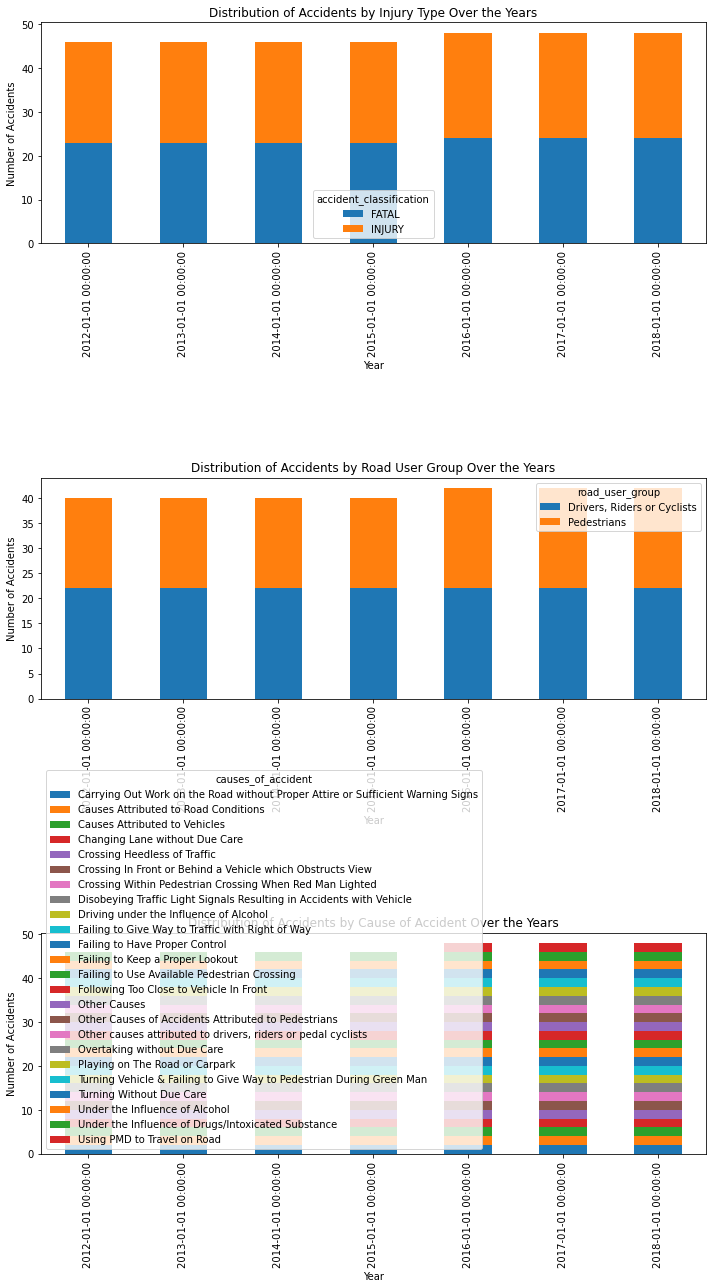

In [248]:
# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Plot for accident_classification
ax1 = axes[0]
ra.groupby(['year', 'accident_classification']).size().unstack().plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Distribution of Accidents by Injury Type Over the Years')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Accidents')

# Plot for road_user_group
ax2 = axes[1]
ra.groupby(['year', 'road_user_group']).size().unstack().plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('Distribution of Accidents by Road User Group Over the Years')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Accidents')

# Plot for causes_of_accident
ax3 = axes[2]
ra.groupby(['year', 'causes_of_accident']).size().unstack().plot(kind='bar', stacked=True, ax=ax3)
ax3.set_title('Distribution of Accidents by Cause of Accident Over the Years')
ax3.set_xlabel('Year')
ax3.set_ylabel('Number of Accidents')

plt.tight_layout()
plt.show()

As the stacked bar chart above can be quite messy, we try to simplify it by only displaying the top 5 categories with the most number of recorded accidents.

<Figure size 720x432 with 0 Axes>

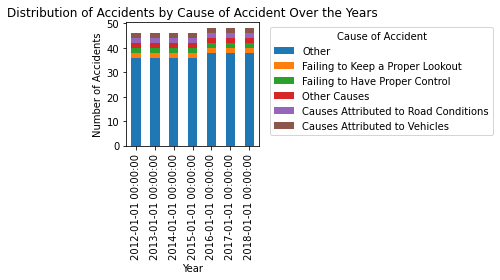

In [249]:
# Group causes_of_accident into top categories and 'Other'
top_categories = ra['causes_of_accident'].value_counts().nlargest(5).index.tolist()  # Select top 5 categories
ra['causes_of_accident_grouped'] = ra['causes_of_accident'].apply(lambda x: x if x in top_categories else 'Other')

# Sort categories so that 'Other' appears at the top
category_order = ['Other'] + top_categories

# Create a bar plot for causes_of_accident_grouped over the years
plt.figure(figsize=(10, 6))
ra['causes_of_accident_grouped'] = pd.Categorical(ra['causes_of_accident_grouped'], categories=category_order, ordered=True)
ra.groupby(['year', 'causes_of_accident_grouped']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of Accidents by Cause of Accident Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Cause of Accident', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

The stacked bar chart above reflects the top 5 categories, namely "falling to keep a proper lookout", "falling to have proper control", "other causes", "causes attributed to road conditions" and "causes attributed to vehicles". As for the rest of the categories, they are all grouped under "other". 

In [250]:
# Group by year and sum up the numeric variables
ra_by_year = ra.groupby('year').agg({
    'number_of_accidents': 'sum',  # Total number of fatal accidents
    # Include other numeric variables here
}).reset_index()

ra_by_year.head(20)

,year,number_of_accidents
0,2012-01-01,7566
1,2013-01-01,7000
2,2014-01-01,7327
3,2015-01-01,7181
4,2016-01-01,6620
5,2017-01-01,5210
6,2018-01-01,5056


We also grouped the data according to the year so as to see the trend in the number of accidents that happened over the years.

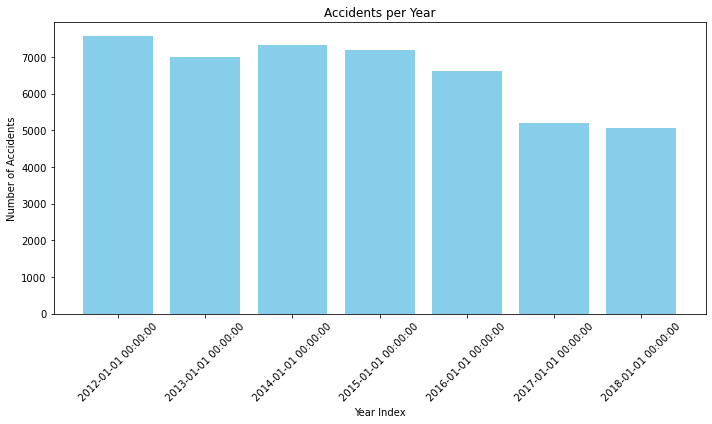

In [251]:
# Plotting the bar chart using numerical indices for x-axis
plt.figure(figsize=(10, 6))
plt.bar(range(len(ra_by_year)), ra_by_year['number_of_accidents'], color='skyblue')
plt.xlabel('Year Index')
plt.ylabel('Number of Accidents')
plt.title('Accidents per Year')
plt.xticks(range(len(ra_by_year)), ra_by_year['year'], rotation=45)  # Set x-ticks and labels
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

We observe that the total number of accidents generally decreased over the years.

## Dataset 8: Vehicles involved in accidents

In [252]:
# Extracting data from vehicles_accident spreadsheet
va = pd.read_csv('vehicles_accident.csv')

# Print the first 5 data to have an overview
va.head()

,Year,Total,Bicycles And Power Assisted Bicycles,Motor Cycles & Scooters,Motor Cars & Station Wagons,Goods Vans & Pick-Ups,"Lorries, Tipper Trucks & Trailers",Buses,Others
0,2015,14982,643,4694,6930,617,1413,568,117
1,2016,15369,633,4913,7172,657,1321,572,101
2,2017,14168,605,4619,6680,539,1128,494,103
3,2018,14062,513,4748,6423,549,1220,510,99
4,2019,14133,473,4860,6643,552,1051,468,86


In [253]:
# Find out the number of rows in the vehicles_accident spreadsheet
print("Data dims : ", va.shape)

Data dims :  (8, 9)


In [254]:
# Change year to a Date variable
va['Year'] = pd.to_datetime(va['Year'], format='%Y')

# Data set is small, can just list out all the rows
va.head(8)

,Year,Total,Bicycles And Power Assisted Bicycles,Motor Cycles & Scooters,Motor Cars & Station Wagons,Goods Vans & Pick-Ups,"Lorries, Tipper Trucks & Trailers",Buses,Others
0,2015-01-01,14982,643,4694,6930,617,1413,568,117
1,2016-01-01,15369,633,4913,7172,657,1321,572,101
2,2017-01-01,14168,605,4619,6680,539,1128,494,103
3,2018-01-01,14062,513,4748,6423,549,1220,510,99
4,2019-01-01,14133,473,4860,6643,552,1051,468,86
5,2020-01-01,9852,581,3364,4374,499,698,279,57
6,2021-01-01,10964,812,3636,4716,577,869,257,97
7,2022-01-01,12346,745,4102,5420,581,1036,366,96


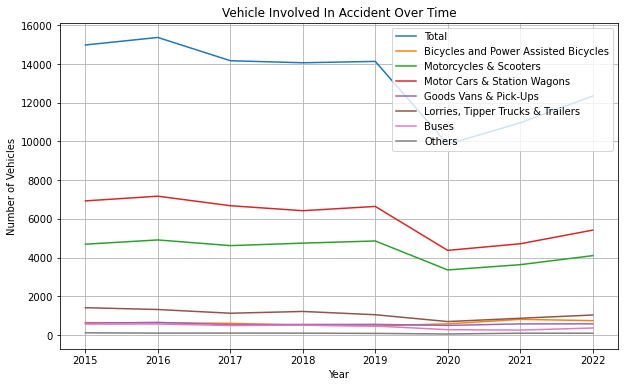

In [255]:
va_total = va.iloc[:, 1]  # Column index 1 corresponds to 'Total'
va_bicycle = va.iloc[:, 2]  # Column index 2 corresponds to 'Bicycles And Power Assisted Bicycles'
va_motorcycle = va.iloc[:, 3]  # Column index 3 corresponds to 'Motor Cycles & Scooters'
va_motorcar = va.iloc[:, 4]  # Column index 4 corresponds to 'Motor Cars & Station Wagons'
va_goodsvan = va.iloc[:, 5]  # Column index 5 corresponds to 'Goods Vans & Pick-Ups'
va_lorries = va.iloc[:, 6]  # Column index 6 corresponds to 'Lorries, Tipper Trucks & Trailers'
va_bus = va.iloc[:, 7]  # Column index 7 corresponds to 'Buses'
va_others = va.iloc[:, 8]  # Column index 8 corresponds to 'Others'
va_years = va['Year']


plt.figure(figsize=(10, 6))
plt.plot(va_years, va_total, label='Total')
plt.plot(va_years, va_bicycle, label='Bicycles and Power Assisted Bicycles')
plt.plot(va_years, va_motorcycle, label='Motorcycles & Scooters')
plt.plot(va_years, va_motorcar, label='Motor Cars & Station Wagons')
plt.plot(va_years, va_goodsvan, label='Goods Vans & Pick-Ups')
plt.plot(va_years, va_lorries, label='Lorries, Tipper Trucks & Trailers')
plt.plot(va_years, va_bus, label='Buses')
plt.plot(va_years, va_others, label='Others')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.title('Vehicle Involved In Accident Over Time')
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

We observe that motor cars, station wagons, motorcycles and scooters are the main vehicles involved in the fatal and injury road traffic accidents. This suggests that efforts to reduce road traffic accidents should be mainly targeted at protecting users of these vehicles. Furthermore, the huge drop in number of vehciles involved in road traffic accidents from 2019 to 2020 is likely due to the COVID-19 breakout. 

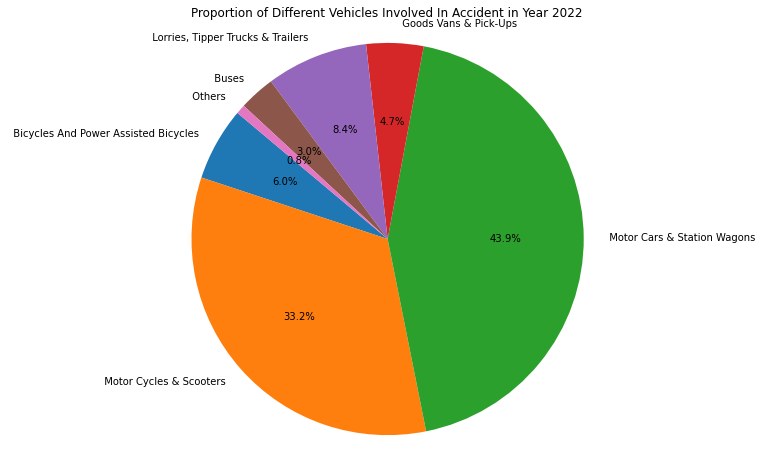

In [256]:
# Filter data for the year 2022
data_2022 = va[va['Year'] == '2022-01-01'].drop(columns=['Year', 'Total'])

# Calculate the total number of vehicles in 2022
total_vehicles = data_2022.sum()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(total_vehicles, labels=total_vehicles.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Different Vehicles Involved In Accident in Year 2022')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Section 1.2: Analysis across datasets (static data) 

## Section 1.2.1 Relationship between Traffic Volume and ERP gantries

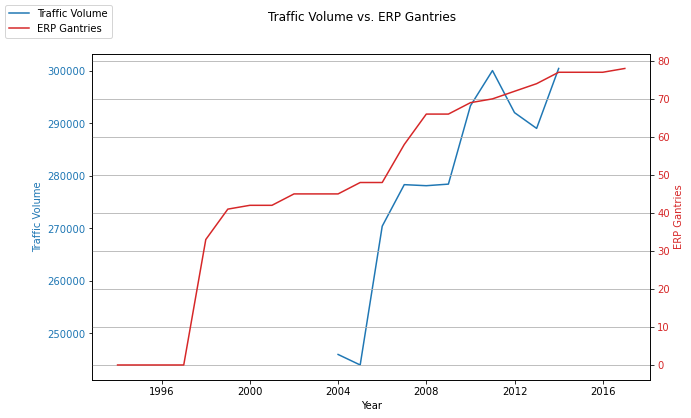

In [257]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Traffic Volume
ax1.plot(tv['year'], tv['ave_daily_traffic_volume_entering_city'], color='tab:blue', label='Traffic Volume')
ax1.set_xlabel('Year')
ax1.set_ylabel('Traffic Volume', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a secondary y-axis for ERP Gantries
ax2 = ax1.twinx()
ax2.plot(tf['year'], tf['ERP Gantries'], color='tab:red', label='ERP Gantries')
ax2.set_ylabel('ERP Gantries', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding title and legend
fig.suptitle('Traffic Volume vs. ERP Gantries')
fig.legend(loc='upper left')

plt.grid(True)
plt.show()

We observe that an increase in the number of ERP gantries is associated with an increase in the amount of traffic volume entering the city. This means that ERP gantries alone might not be a good solution to manage the traffic conditions in Singapore.

## Section 1.2.2: Relationship between Traffic Volume and Pedestrian Facilities

By analysing the relationship between traffic volume and the availability of pedestrian facilities like underpasses, footbridges, and covered linkways, we can identify areas with high pedestrian traffic and insufficient pedestrian infrastructure, which may contribute to congestion or safety issues. 

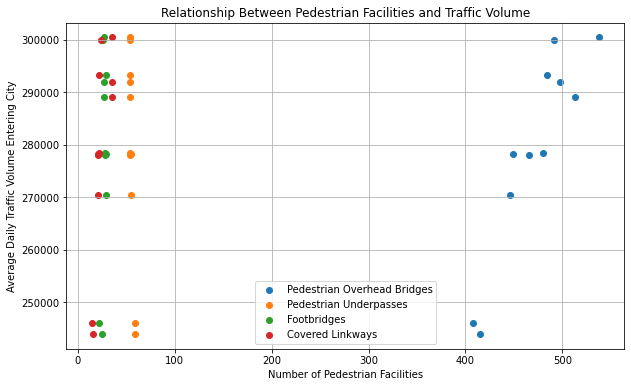

In [258]:
merged_df = pd.merge(tv, pf, on='year', how='inner')

# Scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(merged_df['Pedestrian Overhead Bridges'], merged_df['ave_daily_traffic_volume_entering_city'], label='Pedestrian Overhead Bridges')
plt.scatter(merged_df['Pedestrian Underpasses'], merged_df['ave_daily_traffic_volume_entering_city'], label='Pedestrian Underpasses')
plt.scatter(merged_df['Footbridges'], merged_df['ave_daily_traffic_volume_entering_city'], label='Footbridges')
plt.scatter(merged_df['Covered Linkways'], merged_df['ave_daily_traffic_volume_entering_city'], label='Covered Linkways')

plt.title('Relationship Between Pedestrian Facilities and Traffic Volume')
plt.xlabel('Number of Pedestrian Facilities')
plt.ylabel('Average Daily Traffic Volume Entering City')
plt.legend()
plt.grid(True)

plt.show()

The scatter plot suggests that there is no obvious relationship between the number of pedestrian facilities and the average daily traffic volumne entering city. The observations obtained here might be inaccurate as we do not know the exact location of the pedestrian facilities while the average traffic volume is measured for the vehicles entering the city area.

## Section 1.2.3: Relationship between Traffic Facilities and Road Accidents

We want to investigate the correlation between the presence of traffic facilities such as traffic lights and ERP Gantries and the frequency of road accidents. In particular, we are exploring how the configuration and operation of traffic facilities impact accident rates and traffic flow.

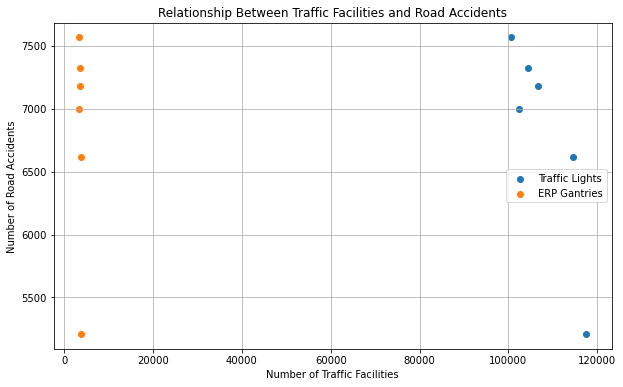

In [259]:
merge = pd.merge(tf, ra, on='year', how='inner')

# Group by year and aggregate the sum of accidents and number of traffic facilities
grouped_df = merge.groupby('year').agg({'Traffic Lights': 'sum', 'ERP Gantries': 'sum', 'number_of_accidents': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))

plt.scatter(grouped_df['Traffic Lights'], grouped_df['number_of_accidents'], label='Traffic Lights')
plt.scatter(grouped_df['ERP Gantries'], grouped_df['number_of_accidents'], label='ERP Gantries')

plt.title('Relationship Between Traffic Facilities and Road Accidents')
plt.xlabel('Number of Traffic Facilities')
plt.ylabel('Number of Road Accidents')
plt.legend()
plt.grid(True)

plt.show()

The scatter plot suggests that there is no obvious relationship between the number of traffic facilities and the number of road accidents.

In [260]:
correlations = grouped_df[['Traffic Lights', 'ERP Gantries', 'number_of_accidents']].corr()

print("Correlation between number of traffic facilities and number of road accidents:")
print(correlations)

Correlation between number of traffic facilities and number of road accidents:
                     Traffic Lights  ERP Gantries  number_of_accidents
Traffic Lights             1.000000      0.957203            -0.877372
ERP Gantries               0.957203      1.000000            -0.787382
number_of_accidents       -0.877372     -0.787382             1.000000


We observe that there is a strong negative correlation between traffic lights and number of accidents. As the number of traffic lights increases, the number of road accidents tends to decrease. 

We also observe that there is a strong negative correlation between ERP gantries and number of accidents. As the number of ERP gantries increases, the number of road accidents tends to decrease.

This seems to suggest that a higher number of traffic lights and ERP gantries might help to reduce the number of road accidents.

## Section 1.2.4: Relationship between Vehicular Facilities and Road Accidents

We want to investigate the correlation between the presence of vehicular facilities such as flyovers, vehicular bridges, and 	vehicular underpasses & tunnels and the frequency of road accidents. In particular, we are exploring how the configuration and operation of vehicular facilities impact accident rates and traffic flow.

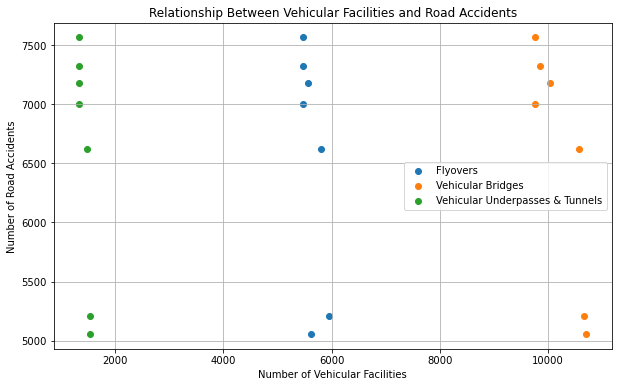

In [261]:
merged = pd.merge(vf, ra, on='year', how='inner')

# Group by year and aggregate the sum of accidents and number of traffic facilities
grouped = merged.groupby('year').agg({'Flyovers': 'sum', 'Vehicular Bridges': 'sum', 'Vehicular Underpasses & Tunnels': 'sum', 'number_of_accidents': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(10, 6))

plt.scatter(grouped['Flyovers'], grouped['number_of_accidents'], label='Flyovers')
plt.scatter(grouped['Vehicular Bridges'], grouped['number_of_accidents'], label='Vehicular Bridges')
plt.scatter(grouped['Vehicular Underpasses & Tunnels'], grouped['number_of_accidents'], label='Vehicular Underpasses & Tunnels')


plt.title('Relationship Between Vehicular Facilities and Road Accidents')
plt.xlabel('Number of Vehicular Facilities')
plt.ylabel('Number of Road Accidents')
plt.legend()
plt.grid(True)

plt.show()

The scatter plot suggests that there is no obvious relationship between the number of vehicular facilities and the number of road accidents.

In [262]:
correlations = grouped[['Flyovers', 'Vehicular Bridges', 'Vehicular Underpasses & Tunnels', 'number_of_accidents']].corr()

print("Correlation between number of vehicular facilities and number of road accidents:")
print(correlations)

Correlation between number of vehicular facilities and number of road accidents:
                                 Flyovers  Vehicular Bridges  \
Flyovers                         1.000000           0.829436   
Vehicular Bridges                0.829436           1.000000   
Vehicular Underpasses & Tunnels  0.820746           0.974996   
number_of_accidents             -0.682745          -0.887044   

                                 Vehicular Underpasses & Tunnels  \
Flyovers                                                0.820746   
Vehicular Bridges                                       0.974996   
Vehicular Underpasses & Tunnels                         1.000000   
number_of_accidents                                    -0.923783   

                                 number_of_accidents  
Flyovers                                   -0.682745  
Vehicular Bridges                          -0.887044  
Vehicular Underpasses & Tunnels            -0.923783  
number_of_accidents                  

We observe that there is a strong negative correlation between vehicular bridges and number of accidents. As the number of vehicular birdges increases, the number of road accidents tends to decrease even more significantly. 

We also observe that there is a strong negative correlation between vehicular underpasses & tunnels and number of accidents. As the number of vehicular underpasses & tunnels increases, the number of road accidents tends to decrease substantially. 

This seems to suggest that a higher number of vehicular facilities might help to reduce the number of road accidents. Vehicular underpasses & tunnels might be the most effective, followed by vehicular bridges.

## Section 1.2.5: Relationship between Traffic Volume and Road Accidents

We want to examine the relationship between traffic volume entering the city and the occurrence of road accidents. We hope to identify congestion hotspots or areas with high accident rates, which may require targeted interventions for traffic management and safety improvements. 

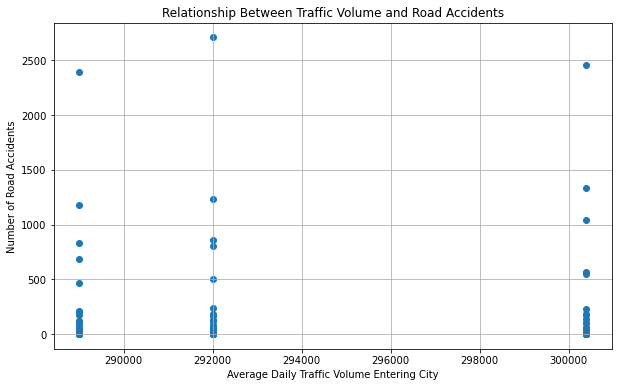

In [263]:
merged_table = pd.merge(tv, ra, on='year', how='inner')

# Plotting
plt.figure(figsize=(10, 6))

plt.scatter(merged_table['ave_daily_traffic_volume_entering_city'], merged_table['number_of_accidents'])

plt.title('Relationship Between Traffic Volume and Road Accidents')
plt.xlabel('Average Daily Traffic Volume Entering City')
plt.ylabel('Number of Road Accidents')
plt.grid(True)

plt.show()

The scatter plot suggests that there is no obvious relationship between the average daily traffic volume entering city and the number of road accidents. We must also recognise the difference in the datasets, whereby the traffic volume data is limited to the city area while the road accidents data is throughout the whole of Singapore.

## Section 1.3 Merging the datasets using "year" column as the common key

By combining datasets together using the common key "year", this allow us to have a better picture, and gain better insights on the relationships between different variables. 

In [264]:
# Convert 'year' column to datetime64[ns] type in DataFrames
pt['year'] = pd.to_datetime(pt['year'], format='%Y')
pf['year'] = pd.to_datetime(pf['year'], format='%Y')
tf['year'] = pd.to_datetime(tf['year'], format='%Y')
vf['year'] = pd.to_datetime(vf['year'], format='%Y')
tv['year'] = pd.to_datetime(tv['year'], format='%Y')
avg['year'] = pd.to_datetime(avg['year'], format='%Y')
ra_by_year['year'] = pd.to_datetime(avg['year'], format='%Y')

# merging the variables together using the column "year"
merged_df = pd.merge(pt, pf, on='year', how='outer')
merged_df = pd.merge(merged_df, tf, on='year', how='outer')
merged_df = pd.merge(merged_df, vf, on='year', how='outer')
merged_df = pd.merge(merged_df, tv, on='year', how='outer')
merged_df = pd.merge(merged_df, avg, on='year', how='outer')
merged_df = pd.merge(merged_df, ra_by_year, on='year', how='outer')

merged_df.head(20)

,year,LRT,MRT,Public Bus,total,Pedestrian Overhead Bridges,Pedestrian Underpasses,Footbridges,Covered Linkways,Traffic Lights,ERP Gantries,Flyovers,Vehicular Bridges,Vehicular Underpasses & Tunnels,ave_daily_traffic_volume_entering_city,ave_speed_expressway,ave_speed_arterial_roads,number_of_accidents
0,1995-01-01,0.0,740000.0,3009000.0,3749000.0,350.0,49.0,15.0,0.00,1308.0,0.0,83,196,12,NaN,NaN,NaN,NaN
1,1996-01-01,0.0,850000.0,3118000.0,3968000.0,359.0,50.0,16.0,0.00,1381.0,0.0,86,196,12,NaN,NaN,NaN,NaN
2,1997-01-01,0.0,911000.0,3116000.0,4027000.0,369.0,50.0,17.0,0.00,1463.0,0.0,93,200,14,NaN,NaN,NaN,NaN
3,1998-01-01,0.0,946000.0,3121000.0,4067000.0,380.0,51.0,22.0,0.00,1528.0,33.0,95,202,18,NaN,NaN,NaN,NaN
4,1999-01-01,27000.0,986000.0,3213000.0,4226000.0,385.0,53.0,22.0,0.00,1624.0,41.0,95,202,18,NaN,NaN,NaN,NaN
5,2000-01-01,39000.0,1047000.0,3251000.0,4337000.0,390.0,54.0,22.0,0.00,1697.0,42.0,95,203,18,NaN,NaN,NaN,NaN
6,2001-01-01,41000.0,1071000.0,3281000.0,4393000.0,390.0,54.0,22.0,0.00,1745.0,42.0,95,203,18,NaN,NaN,NaN,NaN
7,2002-01-01,39000.0,1081000.0,3197000.0,4317000.0,390.0,54.0,22.0,0.00,1799.0,45.0,95,203,18,NaN,NaN,NaN,NaN
8,2003-01-01,50000.0,1171000.0,2992000.0,4213000.0,393.0,54.0,22.0,14.00,1850.0,45.0,98,205,21,NaN,NaN,NaN,NaN
9,2004-01-01,55000.0,1270000.0,2805000.0,4130000.0,408.0,59.0,22.0,14.39,1886.0,45.0,103,207,23,246000.0,62.7,24.8,7566.0


After merging the dataframes together, we would like to tidy up the merged dataframe further, which includes handling the missing values for better readability and easier analysis.

In [265]:
# Convert the 'Year' column to datetime format
merged_df['year'] = pd.to_datetime(merged_df['year'])

# Rename the 'total' column to 'total_public_transport_ridership' 
merged_df.rename(columns={'total': 'total_public_transport_ridership'}, inplace=True)

# gives an overview of dataset
merged_df.head(10)

,year,LRT,MRT,Public Bus,total_public_transport_ridership,Pedestrian Overhead Bridges,Pedestrian Underpasses,Footbridges,Covered Linkways,Traffic Lights,ERP Gantries,Flyovers,Vehicular Bridges,Vehicular Underpasses & Tunnels,ave_daily_traffic_volume_entering_city,ave_speed_expressway,ave_speed_arterial_roads,number_of_accidents
0,1995-01-01,0.0,740000.0,3009000.0,3749000.0,350.0,49.0,15.0,0.00,1308.0,0.0,83,196,12,NaN,NaN,NaN,NaN
1,1996-01-01,0.0,850000.0,3118000.0,3968000.0,359.0,50.0,16.0,0.00,1381.0,0.0,86,196,12,NaN,NaN,NaN,NaN
2,1997-01-01,0.0,911000.0,3116000.0,4027000.0,369.0,50.0,17.0,0.00,1463.0,0.0,93,200,14,NaN,NaN,NaN,NaN
3,1998-01-01,0.0,946000.0,3121000.0,4067000.0,380.0,51.0,22.0,0.00,1528.0,33.0,95,202,18,NaN,NaN,NaN,NaN
4,1999-01-01,27000.0,986000.0,3213000.0,4226000.0,385.0,53.0,22.0,0.00,1624.0,41.0,95,202,18,NaN,NaN,NaN,NaN
5,2000-01-01,39000.0,1047000.0,3251000.0,4337000.0,390.0,54.0,22.0,0.00,1697.0,42.0,95,203,18,NaN,NaN,NaN,NaN
6,2001-01-01,41000.0,1071000.0,3281000.0,4393000.0,390.0,54.0,22.0,0.00,1745.0,42.0,95,203,18,NaN,NaN,NaN,NaN
7,2002-01-01,39000.0,1081000.0,3197000.0,4317000.0,390.0,54.0,22.0,0.00,1799.0,45.0,95,203,18,NaN,NaN,NaN,NaN
8,2003-01-01,50000.0,1171000.0,2992000.0,4213000.0,393.0,54.0,22.0,14.00,1850.0,45.0,98,205,21,NaN,NaN,NaN,NaN
9,2004-01-01,55000.0,1270000.0,2805000.0,4130000.0,408.0,59.0,22.0,14.39,1886.0,45.0,103,207,23,246000.0,62.7,24.8,7566.0


In [266]:
# Find out dimension of merged data currently
print("Data dims : ", merged_df.shape)

Data dims :  (29, 18)


## Section 1.3.1 Using Z score to remove outliers from the merged data 

In [267]:
# Exclude datetime columns from z-score calculation
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns
merged_df_numeric = merged_df[numeric_cols]

# Calculate z-scores for numeric columns
z_scores = (merged_df_numeric - merged_df_numeric.mean()) / merged_df_numeric.std()

# Define a threshold for outliers (e.g., z-score greater than 3 or less than -3)
threshold = 3

# Find rows where any column has an absolute z-score greater than the threshold
outlier_rows = z_scores.abs().gt(threshold).any(axis=1)

# Filter the DataFrame to exclude outlier rows
merged_df = merged_df[~outlier_rows]

# Print the cleaned DataFrame
merged_df.head(20)

,year,LRT,MRT,Public Bus,total_public_transport_ridership,Pedestrian Overhead Bridges,Pedestrian Underpasses,Footbridges,Covered Linkways,Traffic Lights,ERP Gantries,Flyovers,Vehicular Bridges,Vehicular Underpasses & Tunnels,ave_daily_traffic_volume_entering_city,ave_speed_expressway,ave_speed_arterial_roads,number_of_accidents
0,1995-01-01,0.0,740000.0,3009000.0,3749000.0,350.0,49.0,15.0,0.00,1308.0,0.0,83,196,12,NaN,NaN,NaN,NaN
1,1996-01-01,0.0,850000.0,3118000.0,3968000.0,359.0,50.0,16.0,0.00,1381.0,0.0,86,196,12,NaN,NaN,NaN,NaN
2,1997-01-01,0.0,911000.0,3116000.0,4027000.0,369.0,50.0,17.0,0.00,1463.0,0.0,93,200,14,NaN,NaN,NaN,NaN
3,1998-01-01,0.0,946000.0,3121000.0,4067000.0,380.0,51.0,22.0,0.00,1528.0,33.0,95,202,18,NaN,NaN,NaN,NaN
4,1999-01-01,27000.0,986000.0,3213000.0,4226000.0,385.0,53.0,22.0,0.00,1624.0,41.0,95,202,18,NaN,NaN,NaN,NaN
5,2000-01-01,39000.0,1047000.0,3251000.0,4337000.0,390.0,54.0,22.0,0.00,1697.0,42.0,95,203,18,NaN,NaN,NaN,NaN
6,2001-01-01,41000.0,1071000.0,3281000.0,4393000.0,390.0,54.0,22.0,0.00,1745.0,42.0,95,203,18,NaN,NaN,NaN,NaN
7,2002-01-01,39000.0,1081000.0,3197000.0,4317000.0,390.0,54.0,22.0,0.00,1799.0,45.0,95,203,18,NaN,NaN,NaN,NaN
8,2003-01-01,50000.0,1171000.0,2992000.0,4213000.0,393.0,54.0,22.0,14.00,1850.0,45.0,98,205,21,NaN,NaN,NaN,NaN
9,2004-01-01,55000.0,1270000.0,2805000.0,4130000.0,408.0,59.0,22.0,14.39,1886.0,45.0,103,207,23,246000.0,62.7,24.8,7566.0


In [268]:
# Find out dimension of merged data currently
print("Data dims : ", merged_df.shape)

Data dims :  (29, 18)


After removing the outliers, we observe that the dimension of the DataFrame remains unchanged. However, it is crucial to undergo this process to ensure that no outliers are present, as they can significantly skew our analysis.

## Section 1.3.2: Multivariate Analysis using Heat Map

The code produces a heatmap showing the correlation between different variables of our dataframe. 

Each cell in the heatmap represents the correlation coefficient between two variables, with values closer to 1 indicating a strong positive correlation, values closer to -1 indicating a strong negative correlation, and values around 0 indicating little to no correlation.

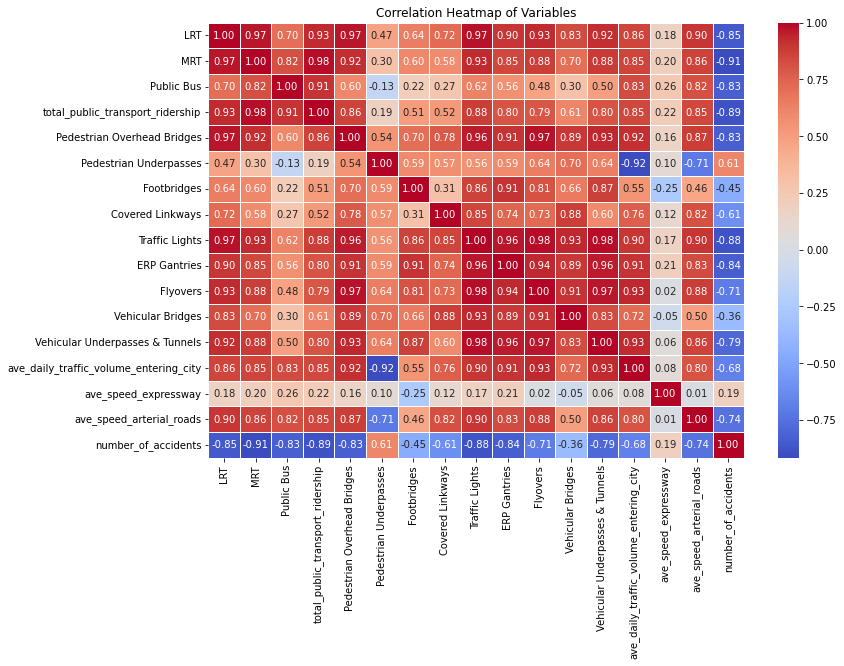

In [269]:
# Calculate correlation matrix
corr_matrix = merged_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

From the heatmap, we can observe that the use of public transport (MRT, LRT, public bus), pedestrian overhead bridges, traffic lights, and ERP Gantries shows a strong negative correlation with the number of accidents. This suggests that as the usage of these modes of transportation and infrastructure increases, the number of accidents tends to decrease. This indicates that investments in public transport infrastructure and traffic management systems may contribute to reducing accidents on the roads.


On the other hand, the number of pedestrian underpasses exhibits a relatively high positive correlation with the number of accidents. This implies that an increase in the number of pedestrian underpasses is associated with a higher number of accidents. This finding underscores the importance of improving safety measures related to pedestrian underpasses, such as better lighting, surveillance, and pedestrian awareness campaigns, to mitigate the risk of accidents in these areas.

## Section 1.3.3: Feature Importance Analysis using Random Forest Model

By performing feature importance analysis, this helps to determine which transportation variables have the most significant impact on accident rates. By understanding which factors contribute most to accidents, this allows for more effective allocation of resources. For example, if certain road infrastructure features (eg. pedestrian bridges, traffic lights) are identified as significant predictors of accidents, we can then prioritize our solutions in improving or modifying these features to enhance safety. 

In [270]:
from sklearn.ensemble import RandomForestRegressor

# Drop any rows with missing values
merged_df.dropna(inplace=True)

# Define features and target variable
X = merged_df.drop(['year', 'number_of_accidents'], axis=1)  # Exclude 'year' and 'number_of_accidents'
y = merged_df['number_of_accidents'] # target variable

# Initialize the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the data
rf.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})

# Sort features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importances)

                                   Feature  Importance
10                                Flyovers    0.114781
12         Vehicular Underpasses & Tunnels    0.098124
7                         Covered Linkways    0.096934
8                           Traffic Lights    0.084430
0                                      LRT    0.080844
9                             ERP Gantries    0.079306
13  ave_daily_traffic_volume_entering_city    0.073111
2                               Public Bus    0.058675
4              Pedestrian Overhead Bridges    0.055956
1                                      MRT    0.055224
14                    ave_speed_expressway    0.054596
3         total_public_transport_ridership    0.050873
15                ave_speed_arterial_roads    0.050097
5                   Pedestrian Underpasses    0.034128
11                       Vehicular Bridges    0.011274
6                              Footbridges    0.001650


From the results, flyovers are identified as the most important feature in predicting the number of accidents. This suggests that areas with a higher number of flyovers may have a higher risk of accidents, possibly due to factors such as complex road configurations, increased traffic flow, or higher speed. 

# Section 1.4: Conclusion from the above data analysis 

1. Efforts should be targeted at motor cars, station wagons, motorcycles and scooters to reduce accidents. 
2. ERP gantries alone might not be a good solution to manage traffic conditions.
3. More traffic lights and ERP gantries might help to reduce the number of road accidents.
4. More vehicular underpasses & tunnels and vehicular bridges might help to reduce the number of road accidents.
5. Areas with a higher number of flyovers may have a higher risk of accidents, possibly due to factors such as complex road configurations, increased traffic flow, or higher speed. 


These are our findings from the above data analysis. However, since we have narrowed down our target audience to be the largest proportion of road users, i.e. drivers, we will focus our solutions to improve the road experiences of drivers instead. These factors will be taken into consideration during solution development but will not be the focal points that we would address.

# Section 2: Real time data from LTA DataMall

Next, we will be transitioning from analyzing historical data to real-time data. 

Real-time data allows our traffic management system (TransportGPT) to respond promptly to changing traffic conditions. By continuously monitoring live traffic data streams, the system can make immediate decisions to optimize traffic flow, mitigate congestion, and improve overall road safety.

Furthermore, real-time data provides insights into current traffic patterns, allowing our system to dynamically adapt its strategies based on the evolving situation on the roads. This adaptability enables the system to address sudden incidents, such as accidents or road closures, by rerouting traffic and deploying appropriate resources in a timely manner.

## Dataset 1: Traffic Incidents

Returns incidents currently happening on the roads, such as
Accidents, Vehicle Breakdowns, Road Blocks, Traffic Diversions etc.

In [271]:
import requests

url = "http://datamall2.mytransport.sg/ltaodataservice/TrafficIncidents"
headers = {'AccountKey': 'sVTUpWfpQW26BJwTAssZSw=='}

try:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()['value']
        
        # Extract relevant attributes from the data
        incident_data = []
        for item in data:
            incident_type = item['Type']
            latitude = item['Latitude']
            longitude = item['Longitude']
            message = item['Message']
            incident_data.append({'Incident Type': incident_type,
                                      'Latitude': latitude,
                                      'Longitude': longitude,
                                      'Message': message})

        incidents = pd.DataFrame(incident_data)

        # shape of the current dataset
        shape = incidents.shape
        print(shape)
        
        # print out the entire dataset
        print(incidents)
    else:
        print("Error:", response.status_code)
except Exception as e:
    print("Error occurred:", str(e))

(20, 4)
        Incident Type  Latitude   Longitude  \
0            Accident  1.327685  103.751706   
1       Heavy Traffic  1.286033  103.797758   
2            Accident  1.302001  103.912234   
3       Heavy Traffic  1.321566  103.856198   
4       Heavy Traffic  1.352606  103.857156   
5       Heavy Traffic  1.358703  103.961791   
6       Heavy Traffic  1.346433  103.638702   
7   Vehicle breakdown  1.355354  103.698222   
8            Roadwork  1.357905  103.883189   
9            Roadwork  1.314244  103.845775   
10           Roadwork  1.289179  103.835032   
11      Heavy Traffic  1.323007  103.889824   
12      Heavy Traffic  1.322816  103.873324   
13           Roadwork  1.318020  103.710064   
14           Roadwork  1.302720  103.899538   
15      Heavy Traffic  1.437327  103.768477   
16           Roadwork  1.357892  103.882709   
17           Roadwork  1.306916  103.915549   
18           Roadwork  1.301072  103.902836   
19           Roadwork  1.369250  103.718623   

    

We will then proceed to extract and add 2 more variables "Date" and "Time" of the traffic incidents to the dataframe.

In [272]:
from datetime import datetime
import re

incidents.head()
# Extract date and time using regular expressions
date_pattern = r'\((\d+/\d+)\)'
time_pattern = r'(\d+:\d+)'

incidents['Date'] = incidents['Message'].str.extract(date_pattern)
incidents['Time'] = incidents['Message'].str.extract(time_pattern)

# Get the current year
current_year = datetime.now().year

# Set the extracted date to the current year
incidents['Date'] = incidents['Date'].apply(lambda x: f"{x}/{current_year}")

# Convert extracted date and time to datetime format
incidents['Date'] = pd.to_datetime(incidents['Date'], format='%d/%m/%Y')
incidents['Time'] = pd.to_datetime(incidents['Time'], format='%H:%M').dt.time

# Get the shape of the current dataset
shape = incidents.shape
print(shape)
        
# assign it to a new dataframe date_time_incidents
date_time_incidents = incidents

# Print the DataFrame with extracted date and time
print(date_time_incidents)

(20, 6)
        Incident Type  Latitude   Longitude  \
0            Accident  1.327685  103.751706   
1       Heavy Traffic  1.286033  103.797758   
2            Accident  1.302001  103.912234   
3       Heavy Traffic  1.321566  103.856198   
4       Heavy Traffic  1.352606  103.857156   
5       Heavy Traffic  1.358703  103.961791   
6       Heavy Traffic  1.346433  103.638702   
7   Vehicle breakdown  1.355354  103.698222   
8            Roadwork  1.357905  103.883189   
9            Roadwork  1.314244  103.845775   
10           Roadwork  1.289179  103.835032   
11      Heavy Traffic  1.323007  103.889824   
12      Heavy Traffic  1.322816  103.873324   
13           Roadwork  1.318020  103.710064   
14           Roadwork  1.302720  103.899538   
15      Heavy Traffic  1.437327  103.768477   
16           Roadwork  1.357892  103.882709   
17           Roadwork  1.306916  103.915549   
18           Roadwork  1.301072  103.902836   
19           Roadwork  1.369250  103.718623   

    

We will visualise the distribution of the data using a bar chart.

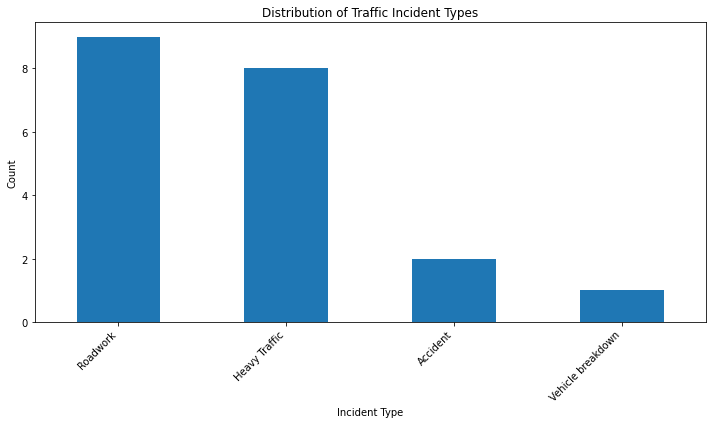

In [273]:
# Bar chart to visualize the distribution of incident types
plt.figure(figsize=(10, 6))
incidents['Incident Type'].value_counts().plot(kind='bar')
plt.title('Distribution of Traffic Incident Types')
plt.xlabel('Incident Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Dataset 2: Road Works

Information on approved road works to be carried out/being carried
out.

In [274]:
url = "http://datamall2.mytransport.sg/ltaodataservice/RoadWorks"

payload = {}
headers = {
  'AccountKey': 'sVTUpWfpQW26BJwTAssZSw=='
}

try:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()['value']
        
        # Extract relevant attributes from the data
        roadworks_data = []
        for item in data:
            EventID = item['EventID']
            StartDate = item['StartDate']
            EndDate = item['EndDate']
            SvcDept = item['SvcDept']
            RoadName = item['RoadName']
            Other = item['Other']
            roadworks_data.append({'EventID': EventID,
                                'StartDate': StartDate,
                                'EndDate': EndDate,
                                'SvcDept': SvcDept,
                                'RoadName': RoadName,
                                'Other': Other})

        roadworks = pd.DataFrame(roadworks_data)
        print(roadworks)
    else:
        print("Error:", response.status_code)
except Exception as e:
    print("Error occurred:", str(e))

                EventID   StartDate     EndDate  \
0    RMINRM-202311-1078  2023-11-23  2024-11-20   
1    RMINRM-202311-1020  2023-11-21  2024-11-19   
2    RMINRM-202311-1078  2023-11-23  2024-11-20   
3    RMINRM-202311-1020  2023-11-21  2024-11-19   
4    RMINRM-202402-0105  2024-02-01  2024-12-31   
..                  ...         ...         ...   
495  RMINRM-202311-1080  2023-11-23  2024-11-20   
496  RMINRM-202311-0512  2023-11-13  2024-05-31   
497  RMINRM-202309-1518  2023-10-02  2024-09-30   
498  RMINRM-202401-0032  2024-01-02  2024-07-01   
499  RMINRM-202311-1243  2023-11-25  2024-11-23   

                                               SvcDept           RoadName  \
0        SINGTEL - ACCESS NETWORK ENGINEERING DIVISION         ADAM DRIVE   
1    SINGTEL-MANAGED SERVICES MGT and CABLE OPERATIONS         ADAM DRIVE   
2        SINGTEL - ACCESS NETWORK ENGINEERING DIVISION          ADAM PARK   
3    SINGTEL-MANAGED SERVICES MGT and CABLE OPERATIONS          ADAM PARK   
4 

## Dataset 3: Variable Message Signs (VMS)

Returns traffic advisories (via variable message services) concerning
current traffic conditions that are displayed on EMAS signboards
along expressways and arterial roads.

Definition of VMS: 
Variable Message Signs (VMS) are digital road signs used to inform car drivers about specific temporary events and real-time traffic conditions. The signs are often linked to a manned control centre via a local network or a radio link.

In [275]:
url = "http://datamall2.mytransport.sg/ltaodataservice/VMS"

payload = {}
headers = {
  'AccountKey': 'sVTUpWfpQW26BJwTAssZSw=='
}

try:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()['value']
        
        # Extract relevant attributes from the data
        vms_data = []
        for item in data:
            EquipmentID = item['EquipmentID']
            latitude = item['Latitude']
            longitude = item['Longitude']
            message = item['Message']
            vms_data.append({'EquipmentID': EquipmentID,
                                      'Latitude': latitude,
                                      'Longitude': longitude,
                                      'Message': message})

        VMS = pd.DataFrame(vms_data)
        print(VMS)
    else:
        print("Error:", response.status_code)
except Exception as e:
    print("Error occurred:", str(e))

   EquipmentID  Latitude   Longitude                                Message
0     TID_0004  1.369047  103.907688      HEAVY VEHICLES-,KEEP TO,LEFT LANE
1    EVMS_RA10  1.295365  103.872098                                       
2     VMS_0001  1.307580  103.876417                     HEAVY VEHICLES...,
3    AVMS_0004  1.303921  103.877905          DO NOT STOP,VEHICLE,IN TUNNEL
4     VMS_0013  1.333434  103.889492                          KEEP IN LANE,
5     TID_0005  1.375941  103.909955        HAVE A SAFE AND,PLEASANT DRIVE,
6     VMS_0015  1.333685  103.889944                       DRIVE WITH CARE,
7    AVMS_0001  1.307320  103.875283                                       
8    EVMS_RV10  1.341555  103.898647                                       
9    EVMS_RF10  1.306751  103.873031   DRIVE SAFELY,SPEED CAMERAS,IN TUNNEL
10   AVMS_0002  1.299576  103.877617   DRIVE SAFELY,SPEED CAMERAS,IN TUNNEL
11   AVMS_0007  1.317068  103.874740          DO NOT STOP,VEHICLE,IN TUNNEL
12   AVMS_00

## Dataset 4: Faulty Traffic Lights

Returns alerts of traffic lights that are currently faulty, or currently
undergoing scheduled maintenance.

In [276]:
import requests

url = "http://datamall2.mytransport.sg/ltaodataservice/FaultyTrafficLights"
headers = {'AccountKey': 'sVTUpWfpQW26BJwTAssZSw=='}

try:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()['value']
        
        # Extract relevant attributes from the data
        faultyLights_data = []
        for item in data:
            AlarmID = item['AlarmID']
            NodeID = item['NodeID']
            Type = item['Type']
            StartDate = item['StartDate']
            EndDate = item['EndDate']
            message = item['Message']
            faultyLights_data.append({'AlarmID': AlarmID,
                                  'NodeID': NodeID,
                                  'Type': Type,
                                  'StartDate': StartDate,
                                  'EndDate': EndDate,
                                  'Message': message})

        faulty_lights = pd.DataFrame(faultyLights_data)
        print(faulty_lights)
    else:
        print("Error:", response.status_code)
except Exception as e:
    print("Error occurred:", str(e))

Empty DataFrame
Columns: []
Index: []


## Dataset 5: Traffic Flow

Returns hourly average traffic flow, taken from a representative month of
every quarter during 0700-0900 hours.

In [277]:
import requests

url = "http://datamall2.mytransport.sg/ltaodataservice/TrafficFlow"

payload = {}
headers = {
  'AccountKey': 'sVTUpWfpQW26BJwTAssZSw=='
}

response = requests.request("GET", url, headers=headers, data=payload)

print(response.text)

{"odata.metadata":"http://datamall2.mytransport.sg/ltaodataservice/$metadata#TrafficFlow","value":[{"Link":"https://dmprod-datasets.s3.ap-southeast-1.amazonaws.com/traffic-flow/data/trafficflow.json?X-Amz-Security-Token=IQoJb3JpZ2luX2VjECkaDmFwLXNvdXRoZWFzdC0xIkcwRQIhALiA4uvkVtD6AFQo6ztoxDHINfniMcWFtDMmVVMIAzojAiAUM5FL6UfyX%2BAOS%2B5TuJut5cMghDHUmOGObj1ROCoX9yrCBQhCEAQaDDM0MDY0NTM4MTMwNCIM6WLeQCKVjpI7RVwdKp8FaiaB%2FvMaOrW4N%2BzEgWK2E1wSZDKrm9lqGBoCw4SVzdWPA8gh4gSrpC8dX%2FWSPmCcuvJw7e%2FbZSvj4fk1MIg1q5O4wI5rilanmU2wqL9PpoItpWdsXWDuCOXPa6wLtdQfE9mpwBJJBqHO3GzhVnCjTvjhzKsfBFu4DcVnGCFLhGaZ95wwk%2FtWMi8Na6DLjbKDFdNd3G3ymPOLdO2qb6GkXZNnxc0rKxmG%2BmlQoaSJPgCvyFEyawk4DS7Q2guRxIQmyIUX%2FLBCySL%2FVy20NThT1XWwEyfo5apXy21rXfrp8B%2BqIQHE8EdveaMCnf5oCk28JpQmqJNJ06LMLnHiyYPt1DvU5GJkdg0hUw14BRqdA7Vedyxivwfpj9m7CO9ervwT0gda7Cu3ml1I7GJ34msfT27KLleSN19MxsWLy3jes7yo8RNInoLnkC%2BkbkzUHNQ%2F5lwk7QrTaYTLZPppj7JBrnRaq101UuxSgkl9qDJlARpRH8i02JPdVj3DapVS6q22e6YMuCFjpgZRxM1baUVzhdlIT7g71wqqagTFLMsarnmCdaSClO3Q5h

In [278]:
import pandas as pd
import json

# Read the JSON data from the file
with open("trafficflow.txt", "r") as file:
    data = json.load(file)

# Normalize the JSON data to flatten the structure
traffic_flow = pd.json_normalize(data['Value'])

# Print the DataFrame
print(traffic_flow)

          LinkID        Date HourOfDate Volume     StartLon     StartLat  \
0      103000122  01/11/2023          7   3549  103.6944089  1.350438529   
1      103000122  01/11/2023          8   4187  103.6944089  1.350438529   
2      103000122  02/11/2023          7   3681  103.6944089  1.350438529   
3      103000122  02/11/2023          8   4178  103.6944089  1.350438529   
4      103000122  03/11/2023          7   3615  103.6944089  1.350438529   
...          ...         ...        ...    ...          ...          ...   
78734  118001452  28/11/2023          8   2647  103.7029397    1.3613701   
78735  118001452  29/11/2023          7   2104  103.7029397    1.3613701   
78736  118001452  29/11/2023          8   2651  103.7029397    1.3613701   
78737  118001452  30/11/2023          7   2065  103.7029397    1.3613701   
78738  118001452  30/11/2023          8   2720  103.7029397    1.3613701   

            EndLon       EndLat               RoadName RoadCat  
0      103.6944089  1.

## Dataset 6: Bus Stops Traffic Flow

Returns the tap in and tap out volume of each bus stop.

In [279]:
# Extracting data from public_transport spreadsheet
bus = pd.read_csv("transport_node_bus_202402.csv")

# Print the first 5 data to have an overview
bus.head()

,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,2024-02,WEEKENDS/HOLIDAY,17.0,BUS,45379,190,120
1,2024-02,WEEKDAY,17.0,BUS,45379,442,470
2,2024-02,WEEKDAY,13.0,BUS,80051,2873,2873
3,2024-02,WEEKENDS/HOLIDAY,13.0,BUS,80051,1473,1403
4,2024-02,WEEKDAY,13.0,BUS,5319,109,540


In [280]:
# Find highest 10 values for tap in volume
highest_tap_in = bus.nlargest(10, 'TOTAL_TAP_IN_VOLUME')
print("Highest 5 values for tap in volume:")
print(highest_tap_in)

# Find highest 10 values for tap out volume
highest_tap_out = bus.nlargest(10, 'TOTAL_TAP_OUT_VOLUME')
print("\nHighest 5 values for tap out volume:")
print(highest_tap_out)

Highest 5 values for tap in volume:
       YEAR_MONTH DAY_TYPE  TIME_PER_HOUR PT_TYPE  PT_CODE  \
2548      2024-02  WEEKDAY           18.0     BUS    22009   
144866    2024-02  WEEKDAY           18.0     BUS    46009   
82496     2024-02  WEEKDAY           19.0     BUS    22009   
88742     2024-02  WEEKDAY           17.0     BUS    22009   
181662    2024-02  WEEKDAY           19.0     BUS    46009   
174874    2024-02  WEEKDAY            7.0     BUS    22009   
105141    2024-02  WEEKDAY           18.0     BUS    75009   
19951     2024-02  WEEKDAY            8.0     BUS    22009   
141727    2024-02  WEEKDAY           17.0     BUS    46009   
176425    2024-02  WEEKDAY           20.0     BUS    22009   

        TOTAL_TAP_IN_VOLUME  TOTAL_TAP_OUT_VOLUME  
2548                 147827                116753  
144866               130941                 86978  
82496                118817                 69032  
88742                109652                106494  
181662               

We observe that only three PT_code appears, namely 22009, 46009 and 75009.

In [281]:
import requests

url = "http://datamall2.mytransport.sg/ltaodataservice/BusStops"

headers = {'AccountKey': '9jyOck1VT72vbXMlvCHlRw=='}

try:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()['value']
        
        # Extract relevant attributes from the data
        bus_stop_data = []
        for item in data:
            BusStopCode = item['BusStopCode']
            RoadName = item['RoadName']
            Description = item['Description']
            Latitude = item['Latitude']
            Longitude = item['Longitude']
            bus_stop_data.append({'BusStopCode': BusStopCode,
                                  'RoadName': RoadName,
                                  'Description': Description,
                                  'Latitude': Latitude,
                                  'Longitude': Longitude})

        # Create a DataFrame from the extracted data
        bus_stops_df = pd.DataFrame(bus_stop_data)
        print(bus_stops_df)
    else:
        print("Error:", response.status_code)
except Exception as e:
    print("Error occurred:", str(e))

    BusStopCode        RoadName            Description  Latitude   Longitude
0         01012     Victoria St    Hotel Grand Pacific  1.296848  103.852536
1         01013     Victoria St        St. Joseph's Ch  1.297710  103.853225
2         01019     Victoria St        Bras Basah Cplx  1.296990  103.853022
3         01029   Nth Bridge Rd           Opp Natl Lib  1.296673  103.854414
4         01039   Nth Bridge Rd             Bugis Cube  1.298208  103.855491
..          ...             ...                    ...       ...         ...
495       14011     Kg Bahru Rd     Bef Mt Faber Lodge  1.267954  103.825526
496       14019     Kg Bahru Rd     Opp Mt Faber Lodge  1.268489  103.825717
497       14021  Lower Delta Rd   The Pearl @ Mt Faber  1.271330  103.824784
498       14029  Lower Delta Rd                Blk 105  1.272473  103.824188
499       14031  Lower Delta Rd  St. Theresa's Convent  1.276243  103.823060

[500 rows x 5 columns]


The data from the LTA dynamic dataset is limited and hence we had to go online to find the corresponding bus stop names given the bus stop codes. 22009, 46009 and 75009 corresponds to Boon Lay Interchange, Woodlands Interchange and Tampines Interchange respectively.

## Dataset 7: Traffic Speed Bands

Returns current traffic speeds on expressways and arterial roads,
expressed in speed bands.

In [282]:
#OPENING SPEEDBANDS data
url = "http://datamall2.mytransport.sg/ltaodataservice/v3/TrafficSpeedBands"

payload = {}
headers = {
  'AccountKey': '9jyOck1VT72vbXMlvCHlRw=='
}

try:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()['value']
        
        # Extract relevant attributes from the data
        speed_data = []
        for item in data:
            LinkID = item['LinkID']
            RoadName = item['RoadName']
            RoadCategory = item['RoadCategory']
            SpeedBand = item['SpeedBand']
            MinimumSpeed = item['MinimumSpeed']
            MaximumSpeed = item['MaximumSpeed']
            StartLon = item['StartLon']
            StartLat = item['StartLat']
            EndLon = item['EndLon']
            EndLat = item['EndLat']
            speed_data.append({'LinkID': LinkID,
                                    'RoadName': RoadName,
                                    'RoadCategory': RoadCategory,
                                    'SpeedBand': SpeedBand,
                                    'MinimumSpeed': MinimumSpeed,
                                    'MaximumSpeed': MaximumSpeed,
                                    'StartLon': StartLon,
                                    'StartLat': StartLat,
                                    'EndLon': EndLon,
                                    'EndLat': EndLat})

        speed = pd.DataFrame(speed_data)
        print(speed)
    else:
        print("Error:", response.status_code)
except Exception as e:
    print("Error occurred:", str(e))

        LinkID             RoadName RoadCategory  SpeedBand MinimumSpeed  \
0    103000000            KENT ROAD            E          5           40   
1    103000010         BUCKLEY ROAD            E          4           30   
2    103000011         BUCKLEY ROAD            E          4           30   
3    103000014      SHREWSBURY ROAD            E          4           30   
4    103000015      SHREWSBURY ROAD            E          3           20   
..         ...                  ...          ...        ...          ...   
495  103001218       DRAYCOTT DRIVE            D          5           40   
496  103001219       DRAYCOTT DRIVE            D          4           30   
497  103001226      PADANG JERINGAU            D          4           30   
498  103001227      PADANG JERINGAU            D          4           30   
499  103001230  GUILLEMARD CRESCENT            E          4           30   

    MaximumSpeed            StartLon            StartLat              EndLon  \
0      

## Dataset 8: Estimated Travel Times

Returns estimated travel times of expressways (in segments).

In [283]:
#OPENING THE ESTIMATED TRAVEL TIME JSON FILE
import requests
url = "http://datamall2.mytransport.sg/ltaodataservice/EstTravelTimes"

headers = {'AccountKey': '9jyOck1VT72vbXMlvCHlRw=='}

try:
    response = requests.get(url, headers=headers)
    if response.status_code == 200:
        data = response.json()['value']
        
        # Extract relevant attributes from the data
        estimated_travel_time_data = []
        for item in data:
            Name = item['Name']
            Direction = item['Direction']
            FarEndPoint = item['FarEndPoint']
            StartPoint = item['StartPoint']
            EndPoint = item['EndPoint']
            EstTime = item['EstTime']
            estimated_travel_time_data.append({'Name': Name,
                                'Direction': Direction,
                                'FarEndPoint': FarEndPoint,
                                'StartPoint': StartPoint,
                                'EndPoint': EndPoint,
                                'EstTime': EstTime})

        ett = pd.DataFrame(estimated_travel_time_data)
        print(ett)
    else:
        print("Error:", response.status_code)
except Exception as e:
    print("Error occurred:", str(e))

    Name  Direction      FarEndPoint            StartPoint  \
0    AYE          1  TUAS CHECKPOINT   AYE/MCE INTERCHANGE   
1    AYE          1  TUAS CHECKPOINT      TELOK BLANGAH RD   
2    AYE          1  TUAS CHECKPOINT        LOWER DELTA RD   
3    AYE          1  TUAS CHECKPOINT        NORMANTON PARK   
4    AYE          1  TUAS CHECKPOINT  NORTH BUONA VISTA RD   
..   ...        ...              ...                   ...   
176  TPE          2              PIE    PASIR RIS DRIVE 12   
177  TPE          2              PIE            ELIAS ROAD   
178  TPE          2              PIE     PASIR RIS DRIVE 8   
179  TPE          2              PIE        TAMPINES AVE 7   
180  TPE          2              PIE            LOYANG AVE   

                 EndPoint  EstTime  
0        TELOK BLANGAH RD        2  
1          LOWER DELTA RD        1  
2          NORMANTON PARK        4  
3    NORTH BUONA VISTA RD        1  
4             CLEMENTI RD        2  
..                    ...      ..

## Dataset 9: Road Section Line

Returns all the roads present in Singapore.

In [284]:
pip install geopandas

In [285]:
import geopandas as gpd
import fiona

# Read the shapefile
roads_shp = r"RoadSectionLine\RoadSectionLine_Jul2023"  # Replace with the path to your shapefile
road = gpd.read_file(roads_shp)

# Check the first few rows to understand the structure of the data
road.head()

,RD_CD,RD_CD_DESC,geometry
0,None,SEA BREEZE ROAD,"LINESTRING (41260.555 35335.887, 41232.563 354..."
1,None,HILLVIEW AVENUE,"LINESTRING (20404.402 38471.766, 20391.990 384..."
2,None,SERANGOON CENTRAL,"LINESTRING (32508.598 36898.176, 32477.693 369..."
3,None,CHANGI SOUTH STREET 3,"LINESTRING (42949.750 34673.742, 42990.418 347..."
4,None,PANDAN ROAD,"LINESTRING (18683.234 31630.463, 18842.594 312..."


# Section 3: Solution - TransportGPT (Mobile application)

# TransportGPT functions

## Function 1: Returning the nearest incident when the user keys in the road name

Users will be able to input the road name in caps and this feature will subsequently return the description of the nearest accident. This gives users a heads up on the road condition and might convince them to travel on an alternative route instead to avoid traffic jams.

In [286]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [287]:
from geopy.geocoders import Nominatim
from math import radians, sin, cos, sqrt, atan2
import requests

# Extract the first column of roads
roads_list = road['RD_CD_DESC'].tolist()

# Initialize Nominatim geocoder with a recognizable user agent
geolocator = Nominatim(user_agent="my_geocoder")

# Function to calculate distance using Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers

    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c  # Distance in kilometers
    return distance

# User input (road name)
user_location = input("Enter the road name (in caps): ")

# Check if the user input road name exists in the list of roads
if user_location in roads_list:
    # Geocode user location to get latitude and longitude, limit to Singapore
    location = geolocator.geocode(user_location + ", Singapore", country_codes="SG")

    if location:
        user_latitude = location.latitude
        user_longitude = location.longitude
        print(f"Latitude: {user_latitude}, Longitude: {user_longitude}")

        # Fetch data from the API
        url = "http://datamall2.mytransport.sg/ltaodataservice/TrafficIncidents"
        headers = {'AccountKey': 'sVTUpWfpQW26BJwTAssZSw=='}

        try:
            response = requests.get(url, headers=headers)
            if response.status_code == 200:
                data = response.json()['value']

                # Extract relevant attributes from the data
                incident_data = []
                for item in data:
                    incident_type = item['Type']
                    latitude = item['Latitude']
                    longitude = item['Longitude']
                    message = item['Message']
                    incident_data.append({'Incident Type': incident_type,
                                          'Latitude': latitude,
                                          'Longitude': longitude,
                                          'Message': message})

                incidents = pd.DataFrame(incident_data)

                # Calculate distances from user location to incident locations
                incident_locations = incidents[['Latitude', 'Longitude']].values
                distances = [calculate_distance(user_latitude, user_longitude, lat, lon) for lat, lon in incident_locations]

                # Find the closest incident based on distance
                closest_index = distances.index(min(distances))
                closest_incident = incidents.iloc[closest_index]

                # Print the closest incident details
                print(f"Closest incident type: {closest_incident['Incident Type']}")
                print(f"Message: {closest_incident['Message']}")
            else:
                print("Error:", response.status_code)
        except Exception as e:
            print("Error occurred:", str(e))
    else:
        print("Location not found.")
else:
    print("Road name not found.")

Enter the road name (in caps): ORCHARD ROAD
Latitude: 1.3020058, Longitude: 103.8373797
Closest incident type: Roadwork
Message: (22/3)16:56 Roadworks on Outram Road towards Havelock Road. Avoid left lane.


## Function 2: Returning the VMS when the user keys in the road name (if applicable)

Users will be able to input the road name in caps and this feature will subsequently return the VMS message if applicable. This provides users with real-time updates of the message that is also displayed on the roads.

In [288]:
import requests
from geopy.geocoders import Nominatim
from math import radians, sin, cos, sqrt, atan2

# Extract the first column of roads
roads_list = road['RD_CD_DESC'].tolist()

# Define the API endpoint URL and headers
url = "http://datamall2.mytransport.sg/ltaodataservice/VMS"
headers = {'AccountKey': 'sVTUpWfpQW26BJwTAssZSw=='}

# Initialize Nominatim geocoder with a recognizable user agent
geolocator = Nominatim(user_agent="my_geocoder")

# Function to calculate distance using Haversine formula
def calculate_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers

    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad

    a = sin(dlat / 2)**2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c  # Distance in kilometers
    return distance

# User input (road name)
user_location = input("Enter the road name (in caps): ")

# Check if the user input road name exists in the list of roads
if user_location in roads_list:
    # Send a GET request to the API endpoint
    response = requests.get(url, headers=headers)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Parse the JSON response into a Python dictionary
        data = response.json()
        
        # Extract the relevant information from the response data
        if 'value' in data:
            vms_data = data['value']
            
            # Create a DataFrame from the VMS data
            VMS = pd.DataFrame(vms_data)
            
            # Geocode user location to get latitude and longitude, limit to Singapore
            location = geolocator.geocode(user_location + ", Singapore", country_codes="SG")
        
            if location:
                user_latitude = location.latitude
                user_longitude = location.longitude
                print(f"Latitude: {user_latitude}, Longitude: {user_longitude}")
        
                # Calculate distances from user location to incident locations
                incident_locations = VMS[['Latitude', 'Longitude']].values
                distances = [calculate_distance(user_latitude, user_longitude, lat, lon) for lat, lon in incident_locations]
        
                # Find the closest incident based on distance
                closest_index = distances.index(min(distances))
                closest_incident = VMS.iloc[closest_index]
        
                # Check if there is a message available for the closest incident
                closest_message = closest_incident['Message'].strip()  # Remove leading/trailing whitespace
        
                # Print the relevant message of the closest incident or "No message found"
                if closest_message:
                    print(f"Message: {closest_message}")
                else:
                    print("No message found.")
            else:
                print("Location not found.")
        else:
            print("No VMS data found in the API response.")
    else:
        print(f"Error: {response.status_code} - {response.reason}")
else:
    print("Road name not found.")

Enter the road name (in caps): ORCHARD ROAD
Latitude: 1.3020058, Longitude: 103.8373797
No message found.


## Function 3: Returning the speed band of each road

TransportGPT recommends the speed ranges of each road before users start on them, according to planned routes. Drawing from previous data on the type of incident that calls for increased road alterness, the application determines a speedband that is more likely to be safer for both drivers and pedestrians.

For example, if road 1 has no accident, TransportGPT will recommend a regular travelling speedband.

If road 2 has an accident that causes road blockage, TransportGPT will use past data on road accidents to determine a safer speedband for users to travel at - - a slowdown in speed, but one that still keeps traffic moving.

This feature can also be extended to other types of incidents that commonly cause traffic congestion, such as bad weather and road works.

In [289]:
#ENCODE THE SPEEDBANDS DATA 
from sklearn.preprocessing import LabelEncoder
from transformers import GPT2Tokenizer
import torch

# Tokenize text data using GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Tokenize road names using GPT-2 tokenizer
tokenized_road_names = [tokenizer(RoadName)['input_ids'] for RoadName in speed['RoadName']]

# Tokenize road categories using GPT-2 tokenizer
tokenized_road_categories = [tokenizer(RoadCategory)['input_ids'] for RoadCategory in speed['RoadCategory']]

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
encoded_road_names = label_encoder.fit_transform(speed['RoadName'])
encoded_road_names = torch.tensor(encoded_road_names, dtype=torch.long)
encoded_road_categories = label_encoder.fit_transform(speed['RoadCategory'])
encoded_road_categories = torch.tensor(encoded_road_categories, dtype=torch.long)

# Combine encoded features with tokenized descriptions
encoded_data = [{'road_name': encoded_road_name, 
                 'road_category': encoded_road_category, 
                 'road_name_tokens': road_name_tokens,
                 'road_category_tokens': road_category_tokens}
                for encoded_road_name, encoded_road_category, road_name_tokens, road_category_tokens 
                in zip(encoded_road_names, encoded_road_categories, tokenized_road_names, tokenized_road_categories)]

print(encoded_data)

[{'road_name': tensor(66), 'road_category': tensor(4), 'road_name_tokens': [42, 3525, 15107, 2885], 'road_category_tokens': [36]}, {'road_name': tensor(21), 'road_category': tensor(4), 'road_name_tokens': [33, 16696, 25173, 15107, 2885], 'road_category_tokens': [36]}, {'road_name': tensor(21), 'road_category': tensor(4), 'road_name_tokens': [33, 16696, 25173, 15107, 2885], 'road_category_tokens': [36]}, {'road_name': tensor(112), 'road_category': tensor(4), 'road_name_tokens': [9693, 2200, 54, 16811, 4261, 56, 15107, 2885], 'road_category_tokens': [36]}, {'road_name': tensor(112), 'road_category': tensor(4), 'road_name_tokens': [9693, 2200, 54, 16811, 4261, 56, 15107, 2885], 'road_category_tokens': [36]}, {'road_name': tensor(50), 'road_category': tensor(4), 'road_name_tokens': [41, 1847, 1565, 509, 1581, 5673], 'road_category_tokens': [36]}, {'road_name': tensor(50), 'road_category': tensor(4), 'road_name_tokens': [41, 1847, 1565, 509, 1581, 5673], 'road_category_tokens': [36]}, {'roa

In [290]:
from transformers import DistilBertTokenizer, DistilBertModel

# Load pre-trained DistilBERT tokenizer
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Preprocess data and format it for input to the LLM
# Example: Encoding multiple columns from your dataset
road_names = speed['RoadName'].tolist()
road_categories = speed['RoadCategory'].tolist()  # Example additional column
# Encode each column separately
encoded_inputs_road_names = tokenizer(road_names, padding=True, truncation=True, return_tensors='pt')
encoded_inputs_road_categories = tokenizer(road_categories, padding=True, truncation=True, return_tensors='pt')

# Load pre-trained DistilBERT model
model = DistilBertModel.from_pretrained('distilbert-base-uncased')

# Set the model to evaluation mode
model.eval()

# Input the encoded data into the LLM to extract meaningful insights and patterns from the text data
with torch.no_grad():
    outputs_road_names = model(**encoded_inputs_road_names)
    outputs_road_categories = model(**encoded_inputs_road_categories)

# Extract the representations of the input text from the model outputs
representations_road_names = outputs_road_names.last_hidden_state
representations_road_categories = outputs_road_categories.last_hidden_state
# Depending on your specific task, you may need to further process these representations
# For example, you can use the outputs as features for downstream tasks like classification or clustering
print(representations_road_names)
print(representations_road_categories)

tensor([[[-1.7321e-01, -2.0780e-02, -8.3952e-02,  ..., -6.1511e-02,
           1.9961e-02,  4.1058e-01],
         [-5.7101e-02,  8.0580e-02, -1.0489e-01,  ...,  1.4193e-01,
          -1.5675e-01, -1.3676e-01],
         [ 4.0371e-01,  8.4698e-02,  1.5834e-01,  ..., -2.4152e-02,
          -9.4326e-02, -2.9225e-01],
         ...,
         [-5.1021e-02,  1.3541e-01,  7.5495e-02,  ..., -2.3784e-02,
          -2.2781e-01,  1.6437e-01],
         [-7.8572e-02,  1.1041e-01,  8.6304e-02,  ..., -3.9145e-02,
          -2.2233e-01,  4.5542e-03],
         [-2.1940e-02,  5.1970e-02,  2.8353e-02,  ...,  2.7094e-02,
          -4.1015e-01,  1.4233e-01]],

        [[-1.7039e-01,  1.5440e-01, -5.6000e-02,  ..., -1.4073e-01,
           1.8495e-02,  3.8234e-01],
         [ 3.0403e-02,  3.8860e-01,  5.9745e-02,  ..., -1.4697e-02,
          -3.3487e-01,  2.1544e-04],
         [ 4.9530e-01,  5.2461e-01,  1.6562e-01,  ..., -1.5266e-01,
          -4.6537e-03, -1.7339e-01],
         ...,
         [ 2.8090e-02,  3

In [291]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import torch
from torch.utils.data import DataLoader, Dataset
import numpy as np

#Encode Road Names
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')
inputs = tokenizer(list(speed['RoadName']), padding = True, truncation=True, return_tensors='pt', max_length=512)

#Label Encoding
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(speed['RoadCategory'])
labels = torch.tensor(labels, dtype=torch.long)

# Split data into training and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(inputs['input_ids'], labels, test_size=0.1, random_state=42)

# Convert to tensors
train_inputs = torch.tensor(train_inputs)
val_inputs = torch.tensor(val_inputs)
train_labels = torch.tensor(train_labels)
val_labels = torch.tensor(val_labels)

C:\Users\trucl\AppData\Local\Temp\ipykernel_47600\378691534.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_inputs = torch.tensor(train_inputs)
C:\Users\trucl\AppData\Local\Temp\ipykernel_47600\378691534.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_inputs = torch.tensor(val_inputs)
C:\Users\trucl\AppData\Local\Temp\ipykernel_47600\378691534.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_labels = torch.tensor(train_labels)
C:\Users\trucl\AppData\Local\Temp\ipykernel_47600\378691534.py:24: UserWarning: To 

In [292]:
class SpeedBandsDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}  # Problematic line
        item['labels'] = torch.tensor(self.labels[idx])
        return item


# Prepare dataset
train_dataset = SpeedBandsDataset({'input_ids': train_inputs}, train_labels)
val_dataset = SpeedBandsDataset({'input_ids': val_inputs}, val_labels)

# Prepare data loaders
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

In [293]:
from transformers import AdamW, get_linear_schedule_with_warmup

# Load pre-trained DistilBERT model for sequence classification
model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=np.unique(labels).shape[0])

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Prepare optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=5e-5)

epochs = 3
scheduler = get_linear_schedule_with_warmup(
    optimizer, 
    num_warmup_steps=0, 
    num_training_steps=len(train_loader) * epochs
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\trucl\anaconda3\lib\site-packages\transformers\optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [294]:
def train(model, optimizer, scheduler, train_loader, val_loader, epochs=3):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            outputs = model(**batch)
            loss = outputs.loss
            total_loss += loss.item()
            
            loss.backward()
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()
        avg_train_loss = total_loss / len(train_loader)
        print(f'Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss}')
        
        # Validation
        model.eval()
        total_val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for batch in val_loader:
                batch = {k: v.to(device) for k, v in batch.items()}
                outputs = model(**batch)
                loss = outputs.loss
                total_val_loss += loss.item()

                _, predicted = torch.max(outputs.logits, 1)
                labels = batch['labels']
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        avg_val_loss = total_val_loss / len(val_loader)
        accuracy = correct / total
        print(f'Epoch {epoch+1}/{epochs}, Validation Loss: {avg_val_loss}, Accuracy: {accuracy:.4f}')
    
    
    # Save the model state
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'scheduler_state_dict': scheduler.state_dict(),
        'train_loss': avg_train_loss,
        'val_loss': avg_val_loss,
        'accuracy': accuracy
    }, 'saved_model.pth')


# Continue training the model
train(model, optimizer, scheduler, train_loader, val_loader, epochs=3)

C:\Users\trucl\AppData\Local\Temp\ipykernel_47600\959650045.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}  # Problematic line
C:\Users\trucl\AppData\Local\Temp\ipykernel_47600\959650045.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


Epoch 1/3, Training Loss: 1.1657348547065467
Epoch 1/3, Validation Loss: 0.6976453874792371, Accuracy: 0.7600
Epoch 2/3, Training Loss: 0.783384417755562
Epoch 2/3, Validation Loss: 0.408260278403759, Accuracy: 0.9000
Epoch 3/3, Training Loss: 0.4868084360894404
Epoch 3/3, Validation Loss: 0.3089672348328999, Accuracy: 0.9400


In [295]:
# Load the saved model
checkpoint = torch.load('saved_model.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
epoch = checkpoint['epoch']
train_loss = checkpoint['train_loss']
val_loss = checkpoint['val_loss']
accuracy = checkpoint['accuracy']

train(model, optimizer, scheduler, train_loader, val_loader, epochs=3)

C:\Users\trucl\AppData\Local\Temp\ipykernel_47600\959650045.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}  # Problematic line
C:\Users\trucl\AppData\Local\Temp\ipykernel_47600\959650045.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


Epoch 1/3, Training Loss: 0.422755771169537
Epoch 1/3, Validation Loss: 0.3089672348328999, Accuracy: 0.9400
Epoch 2/3, Training Loss: 0.42965072314990194
Epoch 2/3, Validation Loss: 0.3089672348328999, Accuracy: 0.9400
Epoch 3/3, Training Loss: 0.43147660896443485
Epoch 3/3, Validation Loss: 0.3089672348328999, Accuracy: 0.9400


In [296]:
def predict_speed_band(road_name):
    # Tokenize and encode the road name using the same tokenizer as used during training
    encoded_road_name = tokenizer(road_name, padding=True, truncation=True, return_tensors='pt')

    # Perform inference
    with torch.no_grad():
        outputs = model(**encoded_road_name)

    # Obtain the predicted speed band
    predicted_speed_band = torch.argmax(outputs.logits).item()

    return predicted_speed_band

speed_bands_info = {
    1: "Speed range from 0 to 9",
    2: "Speed range from 10 to 19",
    3: "Speed range from 20 to 29",
    4: "Speed range from 30 to 39",
    5: "Speed range from 40 to 49",
    6: "Speed range from 50 to 59",
    7: "Speed range from 60 to 69",
    8: "Speed range from 70 or more"
}
    
# Assume 'road_name' is the road name you want to classify
road_name = "DRAYCOTT DRIVE"
predicted_speed_band = predict_speed_band(road_name)
print(f"The predicted speed band for road name '{road_name}' is '{predicted_speed_band}'.")

The predicted speed band for road name 'DRAYCOTT DRIVE' is '3'.


## Function 4: Road network graph in Singapore + Find connected roads

Users will be able to input the road name and this feature will subsequently return all the connected roads. This also allows users to better plan their journeys and source for alternative routes in the cases of traffic jams.

   RD_CD             RD_CD_DESC  \
0   None        SEA BREEZE ROAD   
1   None        HILLVIEW AVENUE   
2   None      SERANGOON CENTRAL   
3   None  CHANGI SOUTH STREET 3   
4   None            PANDAN ROAD   
..   ...                    ...   
95  None        MERINO CRESCENT   
96  None      HOUGANG STREET 51   
97  None         HILLCREST ROAD   
98  None    JURONG GATEWAY ROAD   
99  None  AYER RAJAH EXPRESSWAY   

                                             geometry  
0   LINESTRING (41260.555 35335.887, 41232.563 354...  
1   LINESTRING (20404.402 38471.766, 20391.990 384...  
2   LINESTRING (32508.598 36898.176, 32477.693 369...  
3   LINESTRING (42949.750 34673.742, 42990.418 347...  
4   LINESTRING (18683.234 31630.463, 18842.594 312...  
..                                                ...  
95  LINESTRING (25035.262 30393.301, 25021.453 303...  
96  LINESTRING (34081.231 39891.598, 34063.152 398...  
97  LINESTRING (25167.076 35228.543, 25110.205 352...  
98  LINESTRING (184

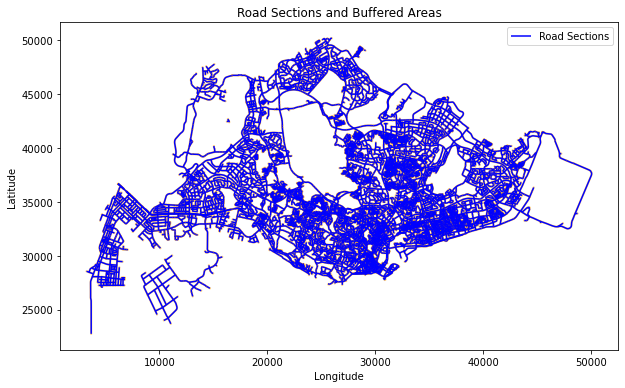

In [298]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Load the Shapefile
file_path = r"RoadSectionLine\RoadSectionLine_Jul2023\RoadSectionLine.shp" 
gdf = gpd.read_file(file_path)

# 2. Exploratory Data Analysis (EDA)
print(gdf.head(100))  # Display the first few rows of the GeoDataFrame
print(gdf.info())  # Get information about the GeoDataFrame

# 3. Spatial Operations (Example: Buffering)
# For example, buffer the road sections by 100 meters
buffered_gdf = gdf.buffer(100)

# 4. Geospatial Visualization
# Plot the original road sections and the buffered areas
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color='blue', label='Road Sections')
buffered_gdf.plot(ax=ax, color='orange', alpha=0.5, label='Buffered Areas')
plt.legend()
plt.title('Road Sections and Buffered Areas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [299]:
!pip install scipy==1.8
!pip install networkx==2.6

In [300]:
import geopandas as gpd
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Iterate over rows in the GeoDataFrame subset
for idx, row in gdf.iterrows():
    # Check if the geometry is a MultiLineString
    if row.geometry.geom_type == 'MultiLineString':
        # Iterate over the individual LineString parts
        for line in row.geometry.geoms:
            # Extract coordinates for each LineString
            coords = list(line.coords)
            # Iterate over consecutive pairs of coordinates to create edges
            for i in range(len(coords) - 1):
                if row['RD_CD_DESC'] != '.':
                    start_point = coords[i]
                    end_point = coords[i+1]

                    # Add nodes
                    G.add_node(start_point)
                    G.add_node(end_point)

                    # Add edge between start and end points
                    G.add_edge(start_point, end_point)

                    # Optionally, you can add road name as an edge attribute
                    road_name = row['RD_CD_DESC']
                    G[start_point][end_point]['road_name'] = road_name
    else:
        # Extract coordinates for the LineString
        coords = list(row.geometry.coords)
        # Iterate over consecutive pairs of coordinates to create edges
        for i in range(len(coords) - 1):
            if row['RD_CD_DESC'] != '.':
                start_point = coords[i]
                end_point = coords[i+1]

                # Add nodes
                G.add_node(start_point)
                G.add_node(end_point)

                # Add edge between start and end points
                G.add_edge(start_point, end_point)

                # Optionally, you can add road name as an edge attribute
                road_name = row['RD_CD_DESC']
                G[start_point][end_point]['road_name'] = road_name

print(G)

Graph with 56009 nodes and 58170 edges


In [301]:
import pandas as pd

# Convert graph edges to DataFrame
graph_df = pd.DataFrame(list(G.edges(data=True)), columns=['Start_Point', 'End_Point', 'Data'])
print(graph_df)

                                    Start_Point  \
0         (41260.55471372977, 35335.8867183011)   
1         (41260.55471372977, 35335.8867183011)   
2         (41260.55471372977, 35335.8867183011)   
3        (41232.56251372956, 35400.00001830049)   
4       (41213.18751372956, 35442.363318299875)   
...                                         ...   
58165  (17208.837129359996, 36770.168759948596)   
58166  (17203.749588252973, 36761.444103160095)   
58167   (17198.012532349218, 36753.13212985949)   
58168   (17191.659268149055, 36745.28109524005)   
58169   (17184.72667955246, 36737.936578513734)   

                                      End_Point  \
0        (41232.56251372956, 35400.00001830049)   
1        (41223.40231372975, 35319.34761830047)   
2       (41307.49611372966, 35356.640618300065)   
3       (41213.18751372956, 35442.363318299875)   
4        (41201.50391372945, 35469.19531830028)   
...                                         ...   
58165  (17203.749588252973, 36

In [302]:
def normalize_road_name(road_name):
    # Convert the road name to lowercase
    return road_name.lower()

def find_connected_roads(graph, road):
    # Normalize the input road name
    road = normalize_road_name(road)
    connected_roads = []
    
    for edge in graph.edges(data=True):
        start_point, end_point, data = edge
        # Extract the road_name from the data dictionary
        road_name = data.get('road_name', '')
        # Normalize the road name from the graph
        norm_road_name = normalize_road_name(road_name)
        
        # Check if the road name matches the specified road
        if norm_road_name == road:
            # Find other edges connected to the start point of road A
            for other_edge in graph.edges(data=True):
                other_start_point, other_end_point, other_data = other_edge
                other_road_name = other_data.get('road_name', '')
                if other_start_point == start_point and other_road_name != road_name and other_road_name not in connected_roads:
                    connected_roads.append(other_road_name)
            
            # Find other edges connected to the end point of road A
            for other_edge in graph.edges(data=True):
                other_start_point, other_end_point, other_data = other_edge
                other_road_name = other_data.get('road_name', '')
                if other_start_point == end_point and other_road_name != road_name and other_road_name not in connected_roads:
                    connected_roads.append(other_road_name)
    
    return connected_roads

In [303]:
road_to_search = input("Enter the road you want to search: ")
connected_roads = find_connected_roads(G, road_to_search)
print(f"Roads connected to {road_to_search}: {connected_roads}")

Enter the road you want to search: ORCHARD ROAD
Roads connected to ORCHARD ROAD: ['PENANG LANE', 'KILLINEY ROAD', 'HANDY ROAD', 'CUPPAGE ROAD', 'CENTRAL EXPRESSWAY', 'BUYONG ROAD', 'FORT CANNING ROAD', 'BENCOOLEN STREET', 'STAMFORD ROAD', 'CUSCADEN ROAD', 'PRINSEP STREET', 'PATERSON ROAD', 'ANGULLIA PARK', 'EMERALD HILL ROAD', 'ORANGE GROVE ROAD', 'OLDHAM LANE', 'BIDEFORD ROAD', 'ORCHARD LINK', 'PENANG ROAD']


# Dashboard Interface of TransportGPT

## Feature 1: Provide notifications for current traffic events or road closures 



By merging the incidents and VMS dataset, incidents such as roadworks, accidents, or closures can be identified at specific locations (latitude and longitude). This allows for notification to drivers approaching these areas. By providing advance notice and alternative route suggestions, drivers can make informed decisions to avoid congested areas, leading to improved traffic flow and reduced travel times.

In [304]:
print(incidents)

        Incident Type  Latitude   Longitude  \
0       Heavy Traffic  1.418866  103.770948   
1       Heavy Traffic  1.390568  103.771167   
2       Heavy Traffic  1.329236  103.865277   
3            Accident  1.327685  103.751706   
4       Heavy Traffic  1.286033  103.797758   
5            Accident  1.302001  103.912234   
6       Heavy Traffic  1.321566  103.856198   
7       Heavy Traffic  1.352606  103.857156   
8       Heavy Traffic  1.358703  103.961791   
9       Heavy Traffic  1.346433  103.638702   
10  Vehicle breakdown  1.355354  103.698222   
11           Roadwork  1.357905  103.883189   
12           Roadwork  1.314244  103.845775   
13           Roadwork  1.289179  103.835032   
14      Heavy Traffic  1.323007  103.889824   
15      Heavy Traffic  1.322816  103.873324   
16           Roadwork  1.318020  103.710064   
17           Roadwork  1.302720  103.899538   
18      Heavy Traffic  1.437327  103.768477   
19           Roadwork  1.357892  103.882709   
20           

In [305]:
print(VMS)

   EquipmentID  Latitude   Longitude                                Message
0     TID_0006  1.378582  103.913648           BE CONSIDERATE,SIGNAL EARLY,
1    AVMS_0010  1.375056  103.910047                                       
2    EVMS_RS10  1.334989  103.892766   PLEASE,SIGNAL BEFORE,SWITCHING LANES
3     VMS_0001  1.307580  103.876417                     HEAVY VEHICLES...,
4     TID_0004  1.369047  103.907688      HEAVY VEHICLES-,KEEP TO,LEFT LANE
5    EVMS_RA10  1.295365  103.872098                                       
6    AVMS_0004  1.303921  103.877905          DO NOT STOP,VEHICLE,IN TUNNEL
7     VMS_0013  1.333434  103.889492                          KEEP IN LANE,
8     TID_0005  1.375941  103.909955        HAVE A SAFE AND,PLEASANT DRIVE,
9     VMS_0015  1.333685  103.889944                       DRIVE WITH CARE,
10   AVMS_0001  1.307320  103.875283                                       
11   EVMS_RV10  1.341555  103.898647                                       
12   EVMS_RF

In [306]:
# Merge incidents dataset with VMS dataset
merged_data_1 = pd.merge(incidents, VMS, on=['Latitude', 'Longitude'], how='left', suffixes=('_incident', '_vms'))

# Merge VMS dataset with incidents dataset
merged_data_2 = pd.merge(VMS, incidents, on=['Latitude', 'Longitude'], how='left', suffixes=('_vms', '_incident'))

# Combine the results to retain data from both datasets
merged_data = pd.concat([merged_data_1, merged_data_2], axis=0, ignore_index=True)

# print out the merged dataset
print(merged_data)

merged_data.columns

        Incident Type  Latitude   Longitude  \
0       Heavy Traffic  1.418866  103.770948   
1       Heavy Traffic  1.390568  103.771167   
2       Heavy Traffic  1.329236  103.865277   
3            Accident  1.327685  103.751706   
4       Heavy Traffic  1.286033  103.797758   
5            Accident  1.302001  103.912234   
6       Heavy Traffic  1.321566  103.856198   
7       Heavy Traffic  1.352606  103.857156   
8       Heavy Traffic  1.358703  103.961791   
9       Heavy Traffic  1.346433  103.638702   
10  Vehicle breakdown  1.355354  103.698222   
11           Roadwork  1.357905  103.883189   
12           Roadwork  1.314244  103.845775   
13           Roadwork  1.289179  103.835032   
14      Heavy Traffic  1.323007  103.889824   
15      Heavy Traffic  1.322816  103.873324   
16           Roadwork  1.318020  103.710064   
17           Roadwork  1.302720  103.899538   
18      Heavy Traffic  1.437327  103.768477   
19           Roadwork  1.357892  103.882709   
20           

Index(['Incident Type', 'Latitude', 'Longitude', 'Message_incident',
       'EquipmentID', 'Message_vms'],
      dtype='object')

In [307]:
# Prepare notifications
notifications = []
for index, row in merged_data.iterrows():
    notification = f"Current Event: {row['Message_incident']} at ({row['Latitude']}, {row['Longitude']})"
    notifications.append(notification)

# Print notifications
print("Notifications for current traffic events or road closures:")
for notification in notifications:
    print(notification)

Notifications for current traffic events or road closures:
Current Event: (22/3)17:35 Heavy Traffic on BKE (towards Woodlands) at SLE Exit. at (1.4188659881093182, 103.77094843003115)
Current Event: (22/3)17:34 Heavy Traffic on KJE (towards BKE) at BKE(Woodlands) Exit. at (1.3905680717398743, 103.77116716646744)
Current Event: (22/3)17:33 Heavy Traffic on PIE (towards Changi Airport) between Onraet Rd and Kallang Way. at (1.3292356099607292, 103.86527740076531)
Current Event: (22/3)17:27 Accident on Boon Lay Way (towards Tuas) after Business Park Drive. Avoid left lane. at (1.327685276305274, 103.75170628832325)
Current Event: (22/3)17:27 Heavy Traffic on AYE (towards MCE) before Alexandra Rd Exit. at (1.286032798294573, 103.79775813821037)
Current Event: (22/3)17:26 Accident on ECP (towards Changi Airport) after Still Rd Sth Exit with congestion till Tg Katong Rd Exit. Avoid lane 1. at (1.3020009079813906, 103.91223414081016)
Current Event: (22/3)17:24 Heavy Traffic on CTE (towards SL

## Feature 2: Map that shows provide real-time location of road incidents

Display real-time information about road incidents, such as accidents, roadblocks, vehicle break-down and traffic diversions.

This enables drivers to take proactive measures to avoid potential hazards. By alerting drivers to these incidents through interactive pop-ups, they can adjust their routes, slow down, or take alternative paths, reducing the risk of accidents caused by sudden stops, congestion, or unexpected obstacles. This timely communication empowers drivers to make informed decisions, promoting safer driving practices and ultimately contributing to accident prevention and road safety.

In [308]:
pip install folium

  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


In [309]:
import folium
import pandas as pd

# Create a map centered at Singapore
singapore_map = folium.Map(location=[1.3521, 103.8198], zoom_start=12)

# Read the dataset from date_time_incidents
data = date_time_incidents

# Add markers for each location in the dataset
for index, row in data.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Message']).add_to(singapore_map)

# Display the map
singapore_map

## Feature 3: Speed Limit Notification

This feature requires users of the app to connect their car GPS system with the application. Through GPS location data, the app can detect the latitude and longitude of the car's current location, whether on expressways or arterial roads. It then reminds users when they exceed the average speed limit for the respective roads, encouraging them to slow down and reduce their driving speed, thereby decreasing the likelihood of accidents.

In [310]:
# Find the average speed limit throughout the years
ave_speed_expressway_yr = avg['ave_speed_expressway'].mean()
ave_speed_arterial_roads_yr = avg['ave_speed_arterial_roads'].mean()

# Display the results
print("Average speed on expressways for the year:", ave_speed_expressway_yr)
print("Average speed on arterial roads for the year:", ave_speed_arterial_roads_yr)

Average speed on expressways for the year: 62.58181818181818
Average speed on arterial roads for the year: 27.590909090909086


In [312]:
!pip install plyer
!pip install emoji

In [313]:
from plyer import notification
import emoji

In [314]:
def monitor_user_speed(latitude, longitude, current_speed, ave_speed_expressway_yr):
    # Compare user's current speed with speed limit
    if current_speed > ave_speed_expressway_yr:
        # Send notification to slow down
        notification_title = "Speed Limit Exceeded"
        notification_message = f"You are traveling at a speed of {current_speed} mph which is faster than the average speed of {round(ave_speed_expressway_yr, 2)} mph. \U0001F622 Please slow down."
        notification.notify(
            title=notification_title,
            message=notification_message
        )
        
# Example usage
# Simulated user's location and current speed
latitude = 1.326104  # Example latitude (PIE)
longitude = 103.90571  # Example longitude (PIE)
current_speed = 65  # Example current speed (in mph)

# Monitor user's speed and check against speed limit
monitor_user_speed(latitude, longitude, current_speed, ave_speed_expressway_yr)

The notification sent to drivers who are driving above average speeds aims to reduce our app users' speed through normative social influence by using descriptive (the average speed that drivers actually drive at) and injunctive norms (what our users should do) to encourage our users to reduce their speed. ⁤⁤ In addition, the sad face reminds them of the negative consequences that could happen if they do not follow the norms. By getting our users to drive safer, we hope to lower the number of speeding incidents and, as a result, reduce accidents.

The library that generates notifications, "plyer," is only capable of delivering notifications to Android phones. For iOS devices, notifications can only be generated using the "pyobjc" library, which can only be run on macOS.